# Unsupervised Learning and Preprocessing

> **Reference**: *Introduction to Machine Learning with Python* -- Andreas C. Mueller & Sarah Guido

This notebook covers unsupervised learning techniques and data preprocessing:

- Types of Unsupervised Learning
- Preprocessing and Scaling (StandardScaler, MinMaxScaler, RobustScaler, Normalizer)
- Principal Component Analysis (PCA)
- Non-Negative Matrix Factorization (NMF)
- Manifold Learning with t-SNE
- Introduction to Clustering (k-Means, Agglomerative Clustering, DBSCAN)

## Setup

In [1]:
!pip install -q mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 14.8 MB/s eta 0:00:00


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['image.cmap'] = "gray"

## 1. Introduction to Unsupervised Learning

In supervised learning, every training example comes with a label (the correct output). In unsupervised learning, there are **no labels** -- the algorithm is given only input data and must discover structure on its own.

Unsupervised learning falls into two broad categories:

| Category | Goal | Examples |
|----------|------|----------|
| **Transformations** | Create a new representation of the data | Dimensionality reduction, feature extraction, topic modeling |
| **Clustering** | Partition data into groups of similar items | Customer segmentation, image grouping, anomaly detection |

A major challenge: without labels, there is no straightforward way to evaluate whether the algorithm has learned something useful. Unsupervised methods are therefore often used in an **exploratory** setting or as a **preprocessing step** for supervised learning.

## 2. Preprocessing and Scaling

Many supervised algorithms (especially SVMs and neural networks) are sensitive to the scale of input features. Features measured in different units or spanning different ranges can dominate distance calculations or gradient updates, leading to poor performance.

**Preprocessing** adjusts the features so they are on a comparable scale. Although preprocessing is typically applied before supervised learning, the scaling methods themselves are unsupervised -- they use only the input data $\mathbf{X}$, not the labels $\mathbf{y}$.

### 2.1 Different Kinds of Preprocessing

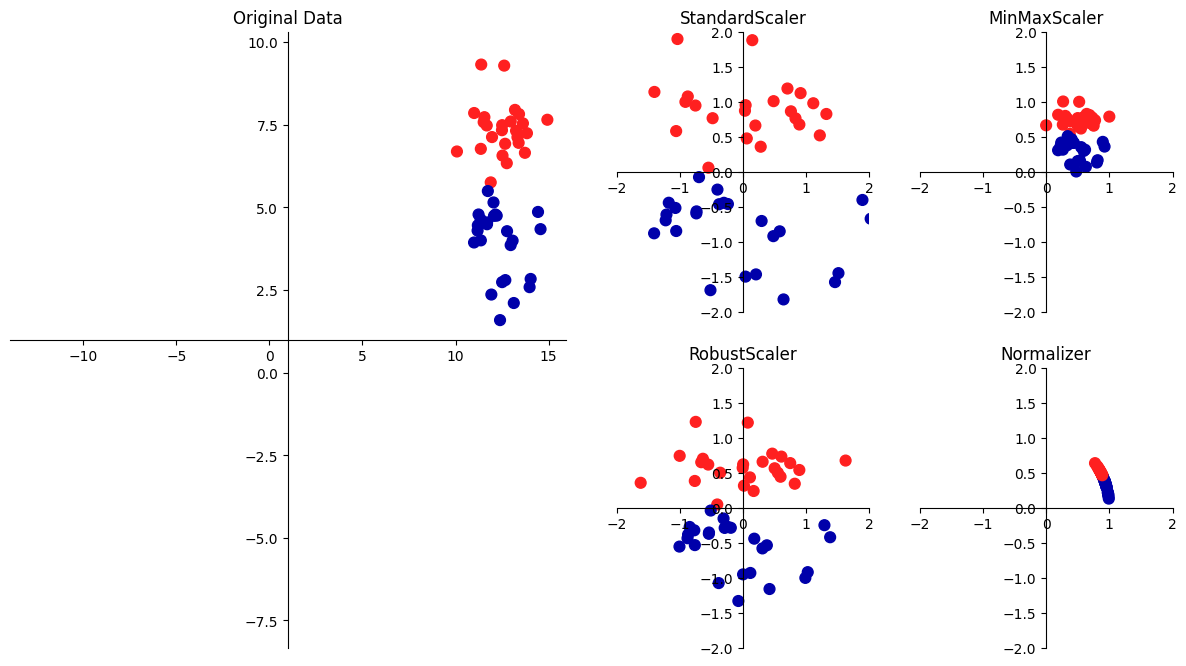

In [3]:
mglearn.plots.plot_scaling()

The figure shows four common scaling methods applied to a synthetic 2D dataset:

| Scaler | Formula | Result |
|--------|---------|--------|
| **StandardScaler** | $x' = \frac{x - \mu}{\sigma}$ | Mean = 0, variance = 1 per feature |
| **RobustScaler** | $x' = \frac{x - \text{median}}{Q_{75} - Q_{25}}$ | Uses median and quartiles; robust to outliers |
| **MinMaxScaler** | $x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$ | All features scaled to [0, 1] |
| **Normalizer** | $x' = \frac{\mathbf{x}}{\|\mathbf{x}\|}$ | Each **sample** (not feature) scaled to unit length |

The first three methods scale each **feature** independently. The Normalizer is different: it scales each **data point** so that its feature vector has Euclidean length 1, projecting all points onto the unit circle (or sphere in higher dimensions). This is useful when only the direction of the data matters, not the magnitude.

### 2.2 Applying Data Transformations

The standard workflow for preprocessing in scikit-learn follows the same `fit` / `transform` API as supervised models:

1. **`fit(X_train)`**: Compute the scaling parameters (e.g., min, max, mean, std) from the training data only.
2. **`transform(X_train)`**: Apply the transformation to the training data.
3. **`transform(X_test)`**: Apply the **same** transformation (using training parameters) to the test data.

This ensures that the test data is scaled consistently with the training data.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


The Breast Cancer dataset has 569 samples and 30 features. After splitting, we have 426 training samples and 143 test samples.

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


After MinMaxScaler transformation, every feature in the training set has minimum 0 and maximum 1. The shape is unchanged -- only the values are shifted and rescaled. The transformation for each feature is:

$$x'_j = \frac{x_j - \min_j}{\max_j - \min_j}$$

where $\min_j$ and $\max_j$ are computed from the training set only.

In [6]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Notice that the test set features are **not** exactly between 0 and 1. Some values are slightly negative (e.g., -0.032) and some exceed 1 (e.g., 1.631). This is expected and correct: the scaler always applies the training set's min and max, so test samples that fall outside the training range will be scaled outside [0, 1].

This is the intended behavior. Using different scaling parameters for the test set would distort the relative positions of test points with respect to the training data.

### 2.3 Why Training and Test Data Must Be Scaled the Same Way

A critical rule: **always fit the scaler on the training data only, then transform both training and test data with that same scaler.** Fitting a separate scaler on the test set would shift and stretch the test data differently, destroying the spatial relationship between training and test points.

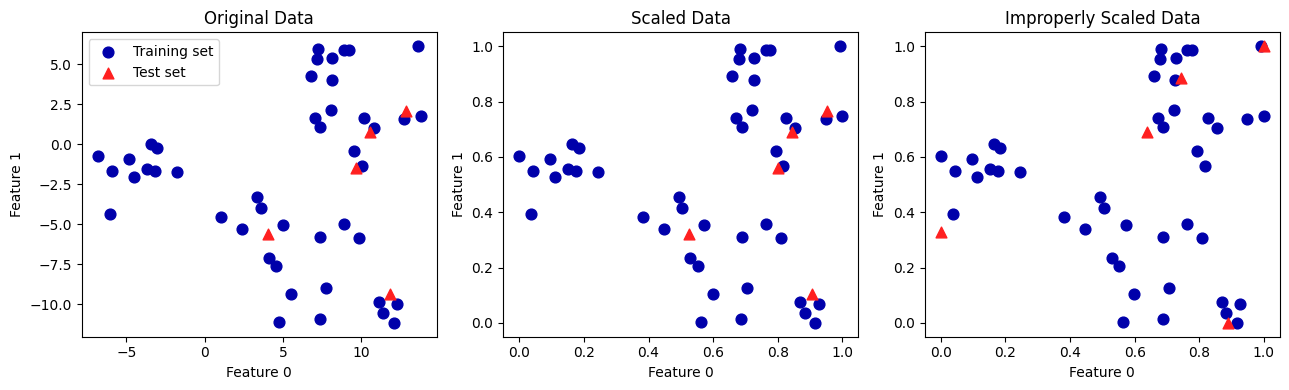

In [7]:
from sklearn.datasets import make_blobs

# Make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# Plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scale the data using MinMaxScaler (CORRECT way)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# WRONG: Scale test set separately
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

plt.tight_layout()

Three panels demonstrate the importance of consistent scaling:

- **Left (Original)**: Unscaled data with training points (circles) and test points (triangles) in their natural positions.
- **Center (Correct)**: Both sets scaled using the training set's min and max. The relative arrangement of training and test points is preserved -- the plot looks identical to the original, just with different axis values.
- **Right (Incorrect)**: Training and test sets scaled independently. The test points have shifted relative to the training points, because each set was forced to its own [0, 1] range. This destroys the spatial relationship and would cause a supervised model to make incorrect predictions.

Think of it this way: if the test set were a single point, there would be no meaningful way to compute its own min and max. The test set size should never affect how preprocessing is applied.

### 2.4 Shortcuts: `fit_transform`

scikit-learn provides a `fit_transform` method that combines `fit` and `transform` in a single call. This is sometimes more computationally efficient and always more concise:

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

Use `fit_transform` on the training set for efficiency. Always use plain `transform` (without fitting again) on the test set.

### 2.5 The Effect of Preprocessing on Supervised Learning

To demonstrate the impact of scaling, we compare an SVM classifier on unscaled vs. scaled data:

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


Without scaling, the SVM may achieve low test accuracy because features have vastly different ranges. Features like "mean area" (ranging in hundreds) can dominate the distance computation while small-scale features like "mean smoothness" are effectively ignored by the kernel. Scaling brings all features to comparable ranges, allowing the SVM to properly consider all of them.

In [10]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


The table below summarizes the effect of scaling:

| Preprocessing | Test Accuracy |
|--------------|---------------|
| None (unscaled) | Low (SVM struggles with unscaled features) |
| MinMaxScaler | Significantly improved |
| StandardScaler | Significantly improved |

This dramatic improvement demonstrates why scaling is essential for SVM and other distance-based or gradient-based algorithms. The exact accuracy values depend on the scikit-learn version, but the pattern is consistent: scaling substantially improves performance.

In [11]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


StandardScaler yields 96% accuracy -- comparable to MinMaxScaler. Both scalers bring all features to a similar range. The choice between them rarely matters much; StandardScaler is more common in practice because it does not bound the transformed values to a fixed range and is less affected by outliers than MinMaxScaler.

The key lesson: **always scale your data before applying SVMs, neural networks, or k-NN.** Tree-based methods (decision trees, random forests, gradient boosting) are invariant to feature scaling.

## 3. Dimensionality Reduction, Feature Extraction, and Manifold Learning

Unsupervised transformations can serve several purposes:
- **Visualization**: Reduce high-dimensional data to 2D for scatter plots.
- **Compression**: Represent data with fewer features while preserving essential information.
- **Denoising**: Remove noise by discarding low-variance components.
- **Preprocessing**: Create better representations for downstream supervised learning.

We cover three algorithms: **PCA** (general-purpose), **NMF** (for non-negative data), and **t-SNE** (for visualization).

### 3.1 Principal Component Analysis (PCA)

PCA finds a new coordinate system for the data by identifying the directions of maximum variance. The procedure:

1. Center the data by subtracting the mean: $\mathbf{X}_c = \mathbf{X} - \bar{\mathbf{X}}$
2. Compute the covariance matrix: $\mathbf{C} = \frac{1}{n-1} \mathbf{X}_c^\top \mathbf{X}_c$
3. Find the eigenvectors $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_p$ of $\mathbf{C}$, sorted by decreasing eigenvalue $\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_p$.
4. The eigenvectors are the **principal components**. The eigenvalue $\lambda_k$ represents the variance captured by the $k$-th component.

To reduce dimensionality, keep only the first $d < p$ principal components. The transformed data is:

$$\mathbf{Z} = \mathbf{X}_c \, \mathbf{V}_d$$

where $\mathbf{V}_d$ is the matrix whose columns are the first $d$ eigenvectors. The result is a $d$-dimensional representation that captures as much variance as possible.

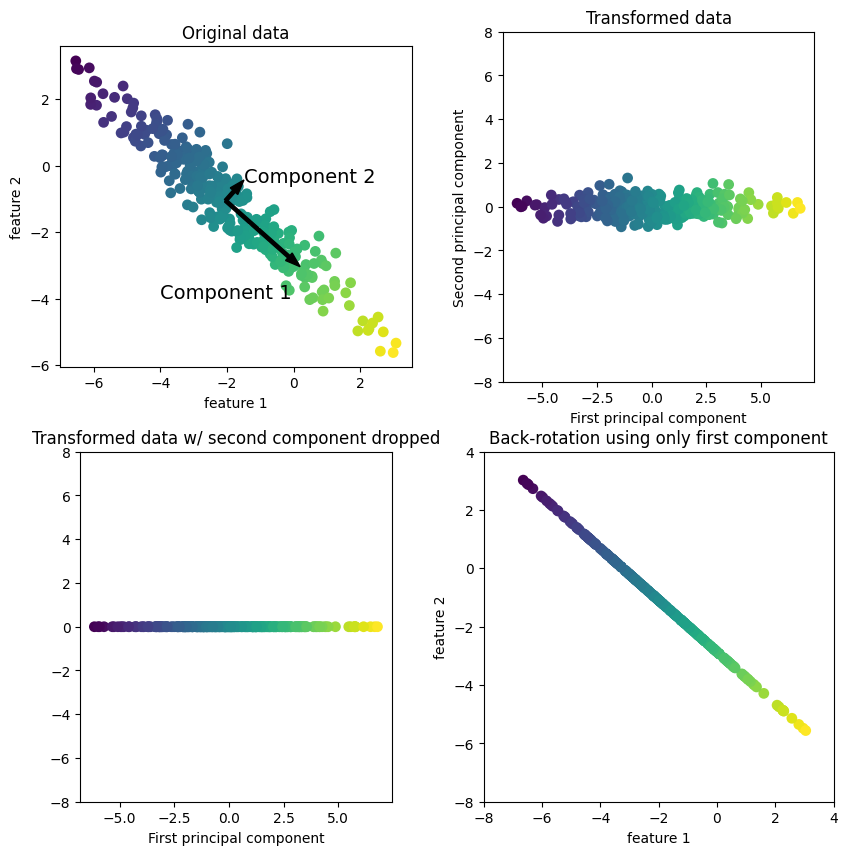

In [12]:
mglearn.plots.plot_pca_illustration()

The four panels illustrate PCA step by step on a 2D dataset:

1. **Top left (Original data)**: The data points are spread along a diagonal. PCA identifies two directions: Component 1 (the direction of maximum variance, roughly diagonal) and Component 2 (perpendicular to Component 1).

2. **Top right (Rotated)**: The data is rotated so that the principal components align with the x- and y-axes. The mean has been subtracted so the data is centered at zero. In this representation, the two features are uncorrelated.

3. **Bottom left (Dimensionality reduction)**: Only the first principal component is kept. The data is now one-dimensional. This discards the least informative direction while retaining the direction that captures the most variance.

4. **Bottom right (Back to original space)**: The one-component representation is projected back to 2D. All points now lie on a line -- the original first principal component direction. Information along the second component is lost, but the most important pattern is preserved.

### 3.2 Applying PCA to the Cancer Dataset for Visualization

With 30 features, the Breast Cancer dataset cannot be visualized directly. A pair plot would require $\binom{30}{2} = 435$ scatter plots. PCA can compress these 30 features into 2 for a single informative scatter plot.

First, let us examine the per-feature distributions using histograms:

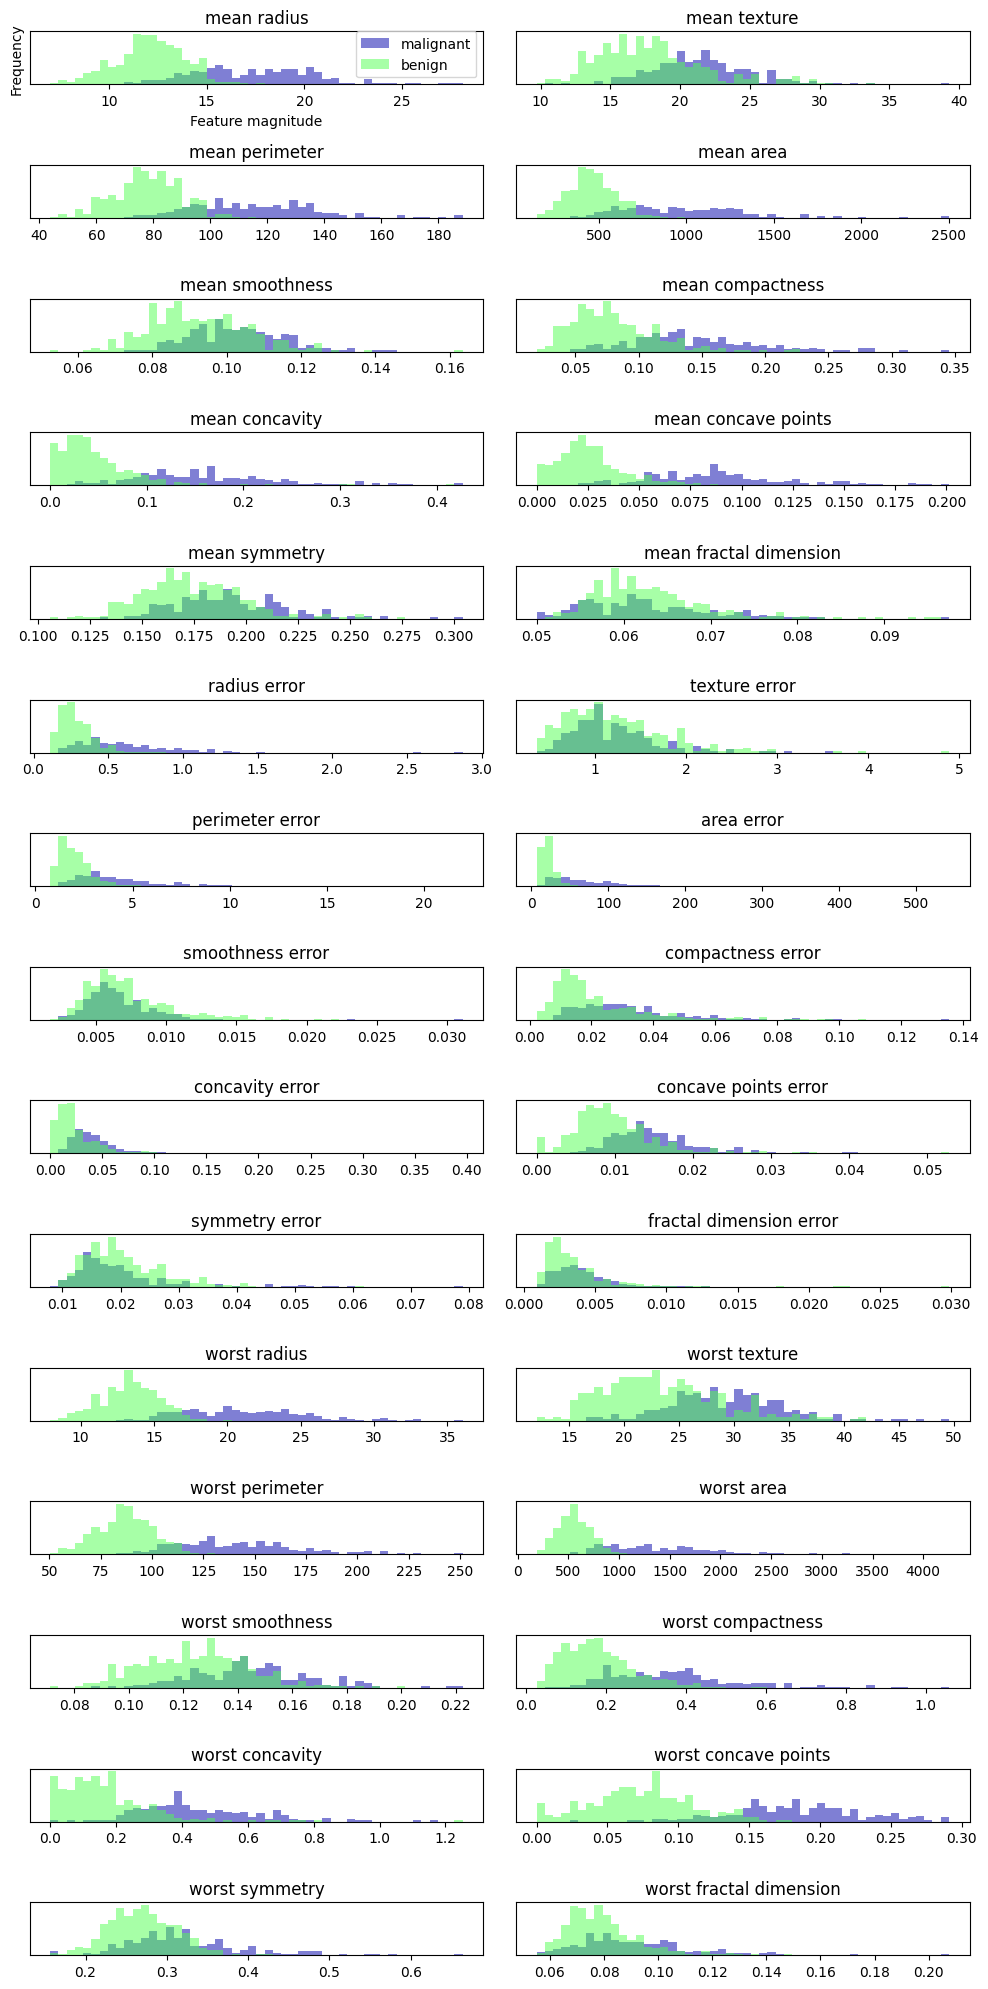

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Each histogram overlays the distribution for malignant (red) and benign (blue) samples for one feature. Some features show clear separation between the two classes: "worst concave points" and "worst perimeter" have largely disjoint distributions. Others like "smoothness error" show heavy overlap, indicating they are less informative on their own.

However, histograms show features in isolation. They cannot reveal how features interact to separate the classes. PCA addresses this by finding directions that capture the dominant joint variation across all 30 features.

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Before applying PCA, we standardize the data so that each feature has mean 0 and variance 1. Without standardization, PCA would be dominated by features with the largest absolute values (like "mean area" which ranges in hundreds) rather than finding the most informative directions across all features.

In [15]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


The data has been reduced from 30 features to 2 principal components. Each sample is now represented by just two numbers: its coordinates in the rotated PCA space.

Text(0, 0.5, 'Second principal component')

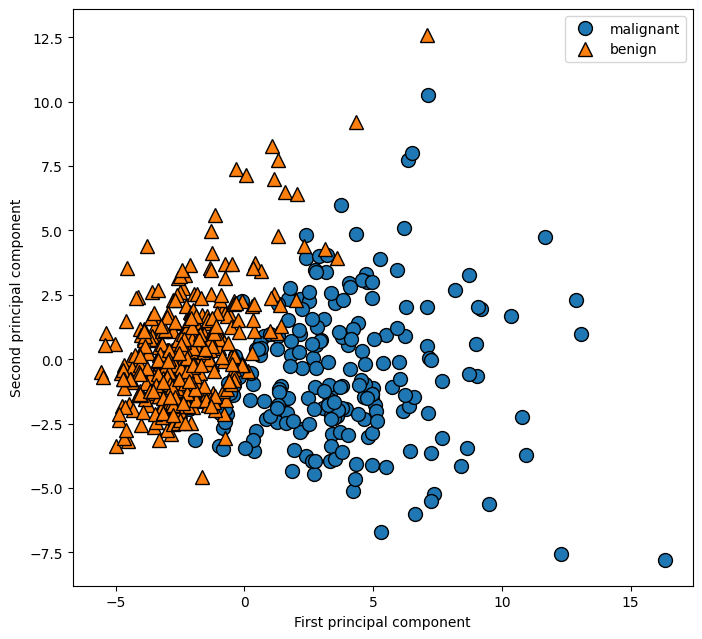

In [16]:
# Plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

The scatter plot shows that the two classes separate reasonably well in the first two principal components. The malignant samples (red) form a more spread-out cluster, while the benign samples (blue) are more concentrated. Even a linear classifier could draw a line in this 2D space to achieve decent accuracy.

Two important points:
- PCA is **unsupervised**: the class labels were not used to find the principal components. The separation emerges because the directions of maximum variance in the data happen to align with the class distinction.
- The axes are **combinations of all 30 original features**, making them hard to interpret directly.

### 3.3 Interpreting PCA Components

The principal components are stored in the `components_` attribute. Each row is one component (a direction in the original 30-dimensional space), and each column corresponds to one original feature:

In [17]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))

PCA component shape: (2, 30)
PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


The shape `(2, 30)` means 2 principal components, each a linear combination of 30 original features. We can visualize these coefficients as a heatmap:

Text(0, 0.5, 'Principal components')

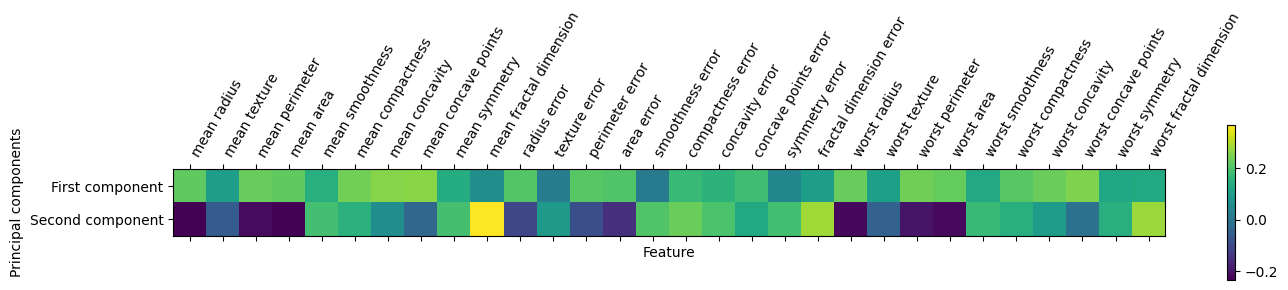

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Key observations from the heatmap:

- **First component**: All 30 coefficients have the same sign (all negative in this case, though the sign is arbitrary). This means the first component captures a general correlation among all features -- when one measurement is large, the others tend to be large too. This "overall size" direction is the dominant source of variation.

- **Second component**: The coefficients have mixed signs. Some features contribute positively and others negatively. This component captures variation that distinguishes features that increase together from features that decrease, providing a more nuanced separation.

Both components involve all 30 features, which is why PCA axes are difficult to interpret as individual measurements. The principal components represent abstract directions that maximize variance, not simple combinations of a few features.

### 3.4 Eigenfaces: PCA for Feature Extraction

PCA is particularly powerful for image data, where pixels are individually uninformative but collectively form meaningful patterns. We demonstrate this using the **Labeled Faces in the Wild** (LFW) dataset -- a collection of celebrity face photographs.

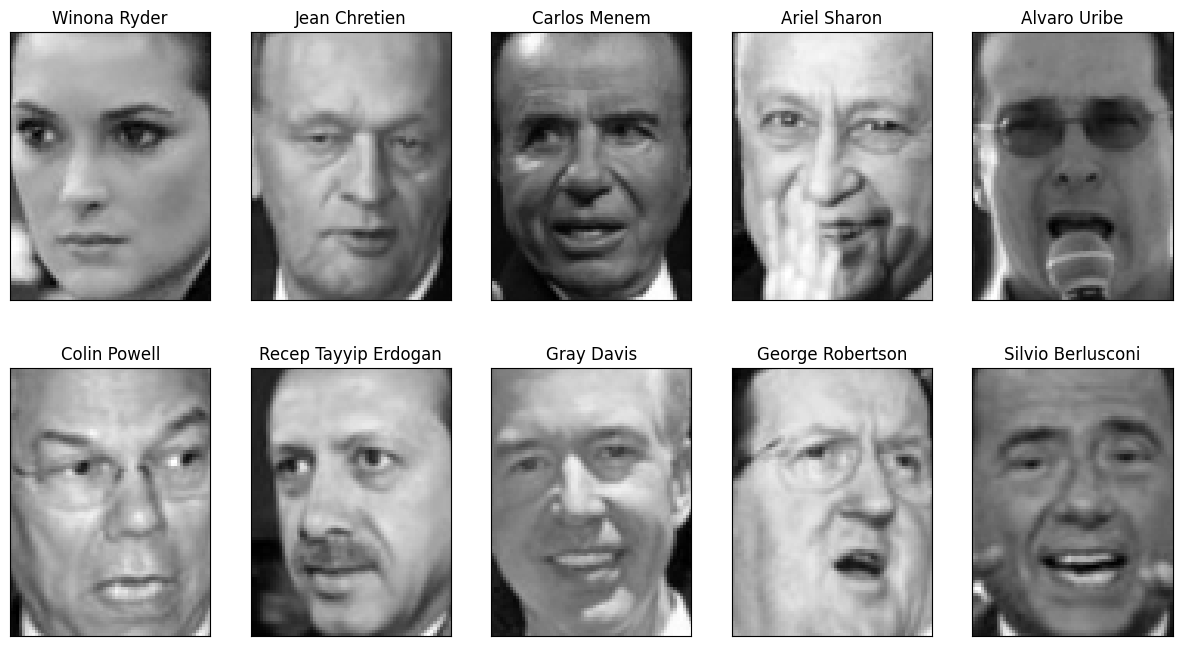

In [19]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

The dataset contains grayscale face images of public figures. Each image is 87 x 65 pixels, giving 5,655 features (one per pixel) per sample.

In [20]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


There are 3,023 images belonging to 62 different people. The dataset is heavily imbalanced:

In [21]:
# Count how often each target appears
counts = np.bincount(people.target)
# Print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='  ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

Some individuals have far more images than others (e.g., George W Bush with 530 images vs. some with only 20). To prevent any single person from dominating the analysis, we limit each person to at most 50 images:

In [22]:
mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
#X_people = X_people / 255.

#### Face Recognition with Raw Pixels vs. PCA Features

A natural approach to face recognition: use 1-nearest neighbor (1-NN) to find the most similar face in the database. Let us first try this with raw pixel features:

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.22


The 1-NN classifier achieves only about 27% accuracy on this 62-class problem. While this is much better than random guessing (1/62 = 1.6%), it is far from practical.

The problem: pixel-level distances are a poor measure of face similarity. Shifting a face one pixel to the right creates a large Euclidean distance despite being perceptually identical. PCA can extract higher-level features that better capture facial characteristics.

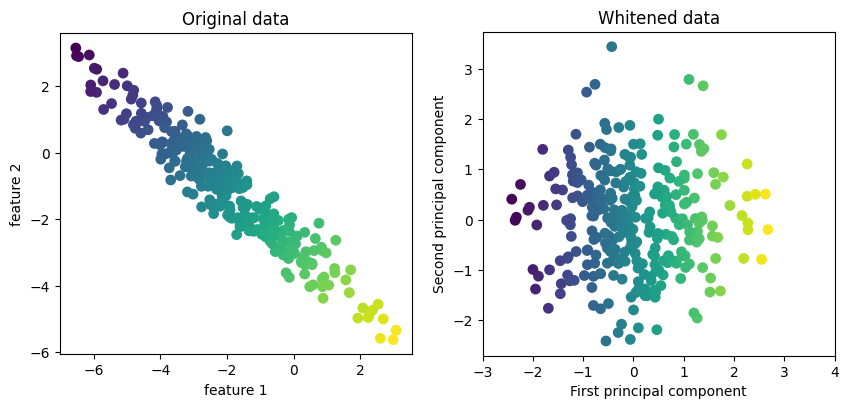

In [24]:
mglearn.plots.plot_pca_whitening()

PCA with **whitening** not only rotates the data but also rescales each component to have unit variance. This is equivalent to applying StandardScaler after the rotation. In the figure, the original elliptical distribution (left) becomes a circular distribution (right) after whitening.

In [25]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


Each face image has been reduced from 5,655 pixel values to 100 principal components -- a compression factor of about 57x. These 100 components capture the most important directions of variation in face images.

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.30


Accuracy improved from 27% to about 36% -- a relative improvement of about 35%. The PCA representation captures higher-level facial features (lighting, pose, expression) that pixel distances miss.

Let us visualize the principal components themselves. Since each component is a vector in the 5,655-dimensional pixel space, we can reshape it back into an image:

pca.components_.shape: (100, 5655)


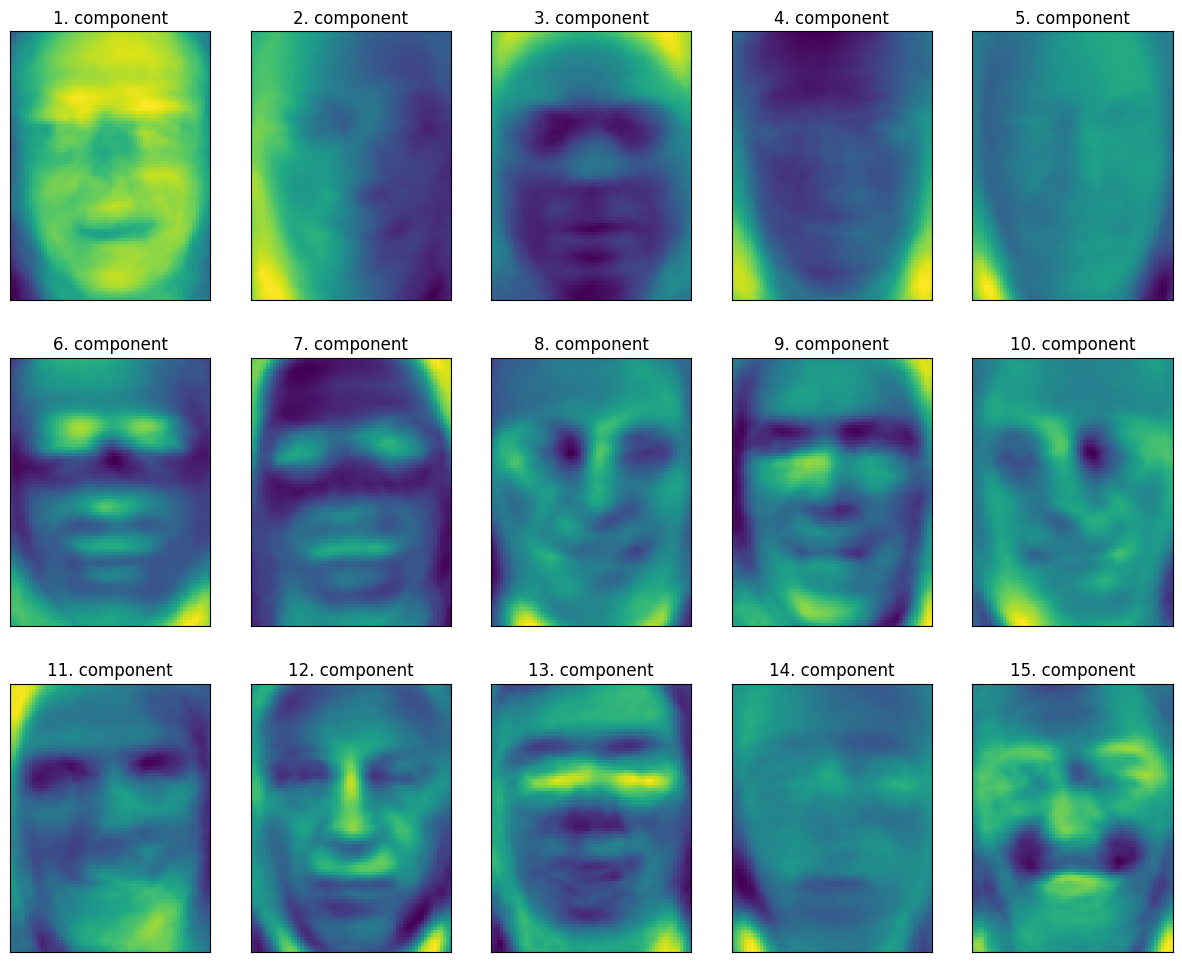

In [27]:
print("pca.components_.shape: {}".format(pca.components_.shape))

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

These are the **eigenfaces** -- the first 15 principal components visualized as images. Each eigenface represents a direction of variation in face space:

- **Component 1**: Primarily captures the contrast between face and background (overall brightness).
- **Component 2**: Encodes differences in lighting between the left and right halves of the face.
- **Components 3-5**: Capture variations in face shape, orientation, and hairstyle.
- **Later components**: Progressively capture finer details.

The eigenfaces contain both positive and negative values (shown as light and dark in the viridis colormap). A face is reconstructed as a weighted sum of these components:

$$\text{face} \approx \bar{\mathbf{x}} + z_1 \cdot \mathbf{v}_1 + z_2 \cdot \mathbf{v}_2 + \cdots + z_d \cdot \mathbf{v}_d$$

where $\bar{\mathbf{x}}$ is the mean face, $\mathbf{v}_k$ are the eigenfaces, and $z_k$ are the coefficients for this particular face.

#### Face Reconstruction with Increasing Components

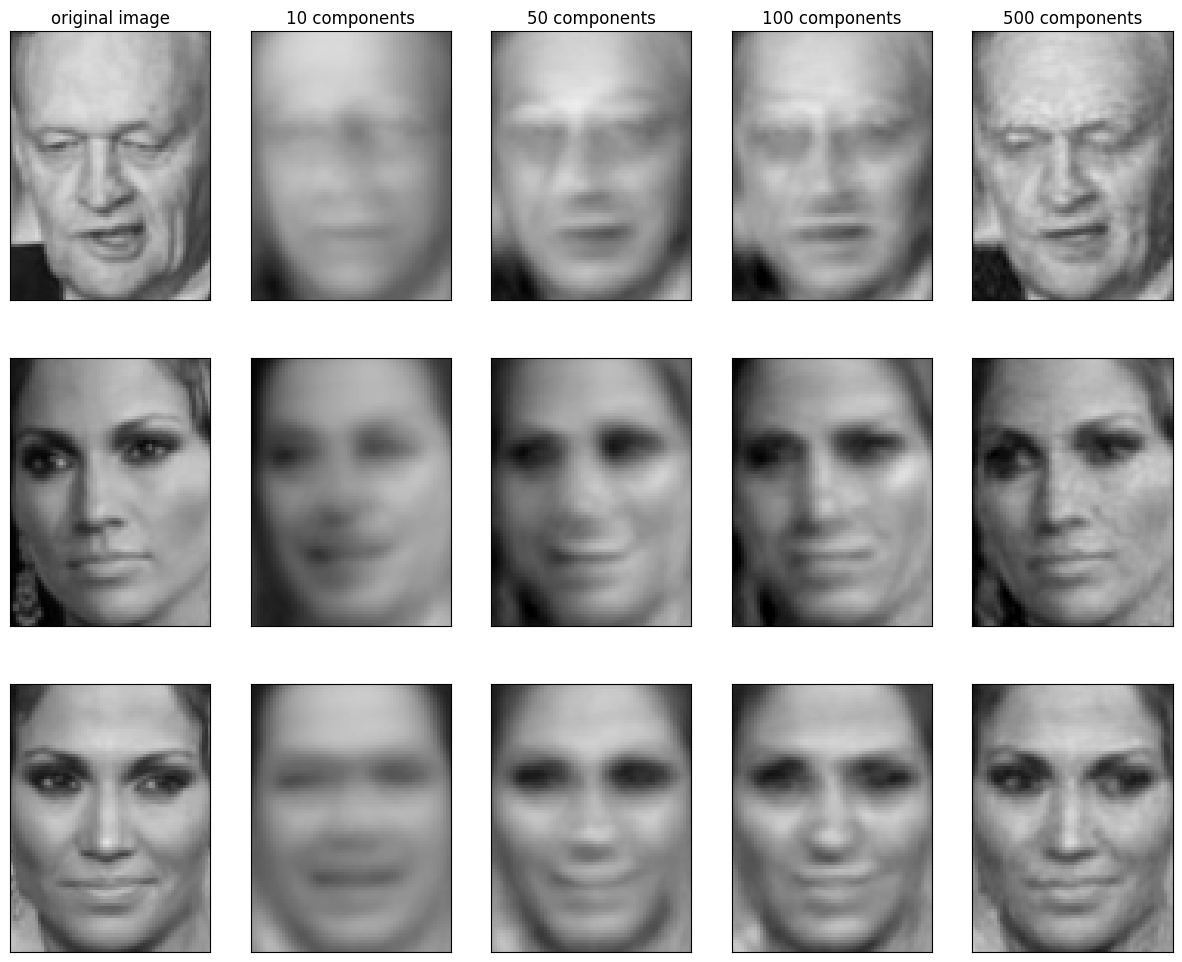

In [28]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

The figure shows three test faces reconstructed using 10, 50, 100, 500, and 2,000 components:

- **10 components**: Only the coarsest features are captured -- face orientation and overall lighting. Individual identity is largely lost.
- **50 components**: Rough facial features emerge. Some individuals become recognizable.
- **100 components**: Most facial features are present, though fine details are smoothed.
- **500 components**: Very close to the original. Hair texture and skin details are visible.
- **2,000 components**: Nearly indistinguishable from the original.

This demonstrates the progressive nature of PCA: the first few components capture the most important global patterns, and each additional component adds finer detail.

#### PCA Scatter Plot of Faces

Text(0, 0.5, 'Second principal component')

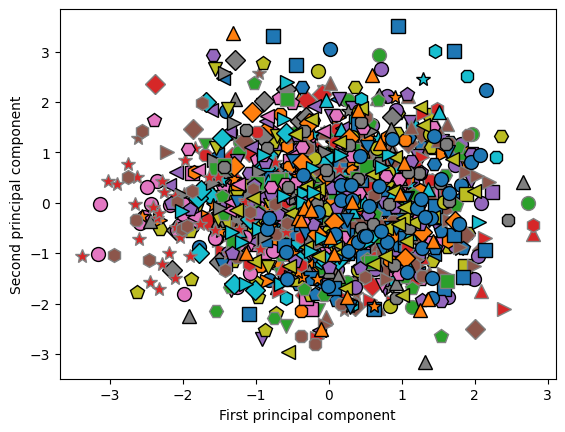

In [29]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Unlike the Breast Cancer dataset, the face data projected onto two components shows no clear class separation -- just a dense blob of overlapping points. This makes sense: with 62 classes and only 2 dimensions, there is not enough room to separate everyone. The first two components capture lighting and contrast, not individual identity. At least 100 components were needed to achieve even modest classification accuracy.

### 3.5 Non-Negative Matrix Factorization (NMF)

NMF is another decomposition method, similar to PCA in that it represents each data point as a weighted sum of components. The key difference: NMF requires both the components and the coefficients to be **non-negative** (greater than or equal to zero).

$$\mathbf{X} \approx \mathbf{W} \mathbf{H}, \quad \text{where } \mathbf{W} \geq 0 \text{ and } \mathbf{H} \geq 0$$

where $\mathbf{W}$ contains the coefficients (shape: $n \times d$) and $\mathbf{H}$ contains the components (shape: $d \times p$).

Because of the non-negativity constraint:
- NMF can only be applied to non-negative data (e.g., pixel intensities, word counts, audio spectrograms).
- The components are **additive parts** of the data, making them more interpretable than PCA components.
- NMF naturally produces a **parts-based** decomposition, where each component represents a recognizable piece of the data.

#### NMF on Synthetic Data

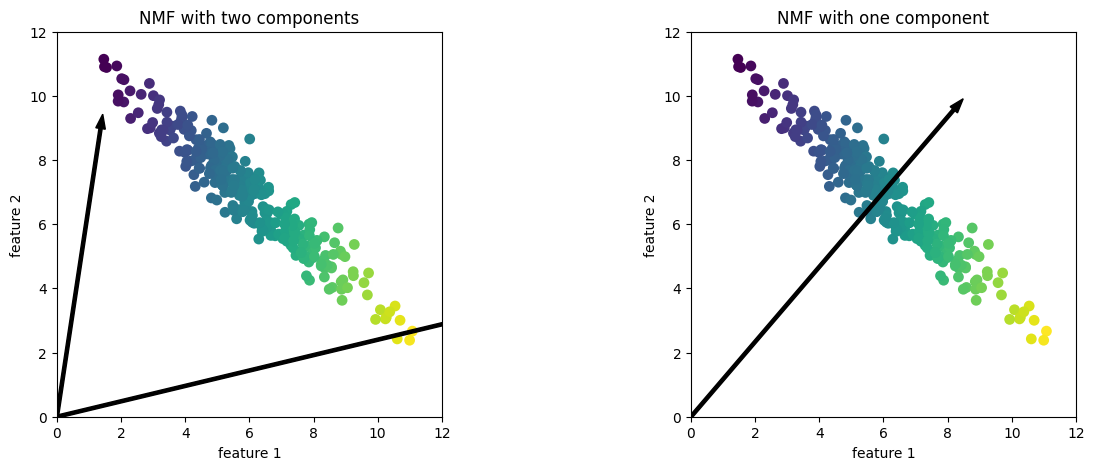

In [30]:
mglearn.plots.plot_nmf_illustration()

The figure shows NMF applied to 2D non-negative data:

- **Left (2 components)**: Both components point from the origin toward the extremes of the data. Every data point can be written as a positive combination of these two directions. The components act as "corners" or "prototypes" that span the data.

- **Right (1 component)**: With only one component, NMF points toward the mean of the data, since that direction best explains all points as positive multiples of a single vector.

Key difference from PCA: reducing the number of NMF components does not simply drop one of the existing components. Instead, it creates an entirely new set of components. There is no natural ordering of NMF components -- they all play equally important roles.

#### NMF on Face Images

#### NMF on Face Images

Like PCA, NMF can be applied to image data. The following shows the NMF components and face reconstructions:

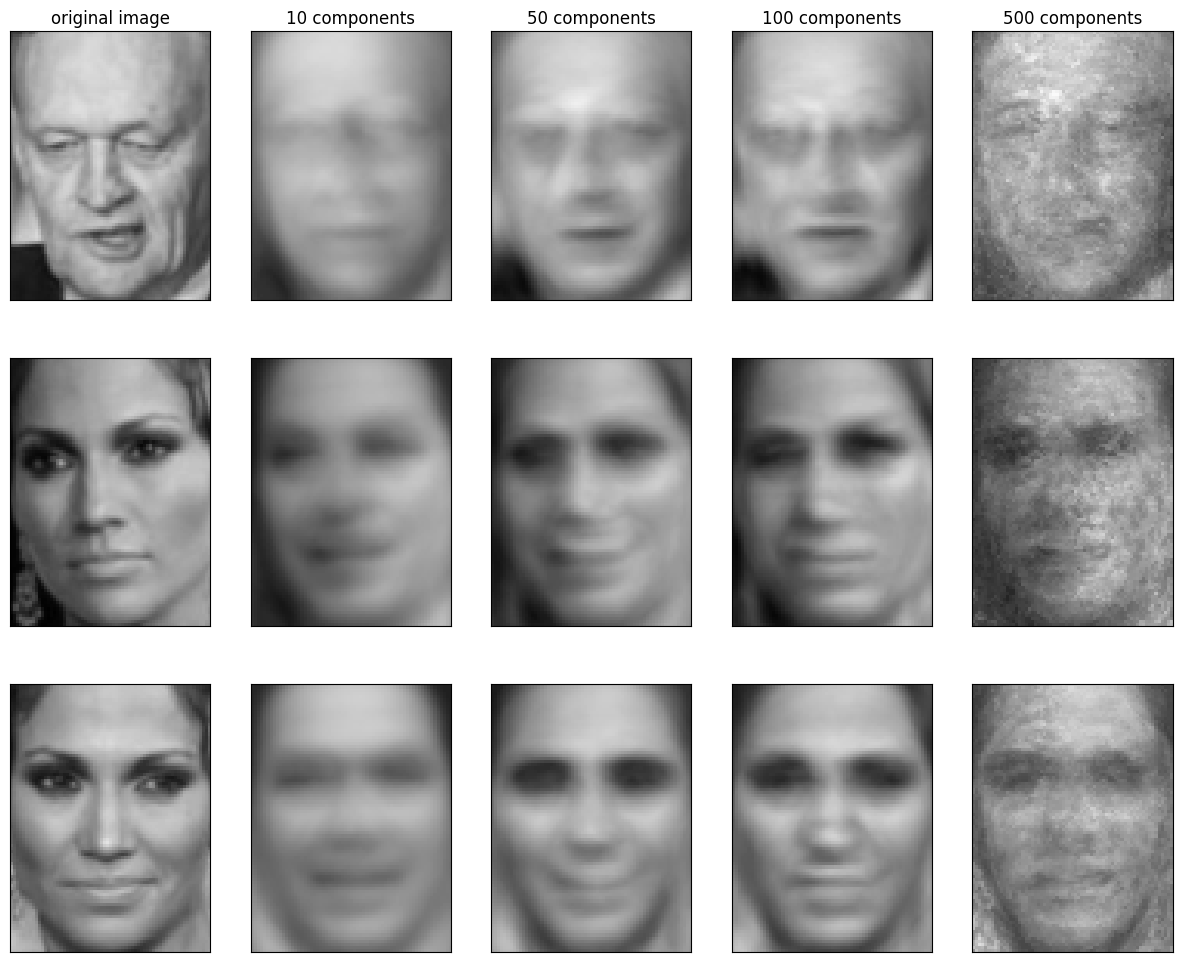

In [31]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

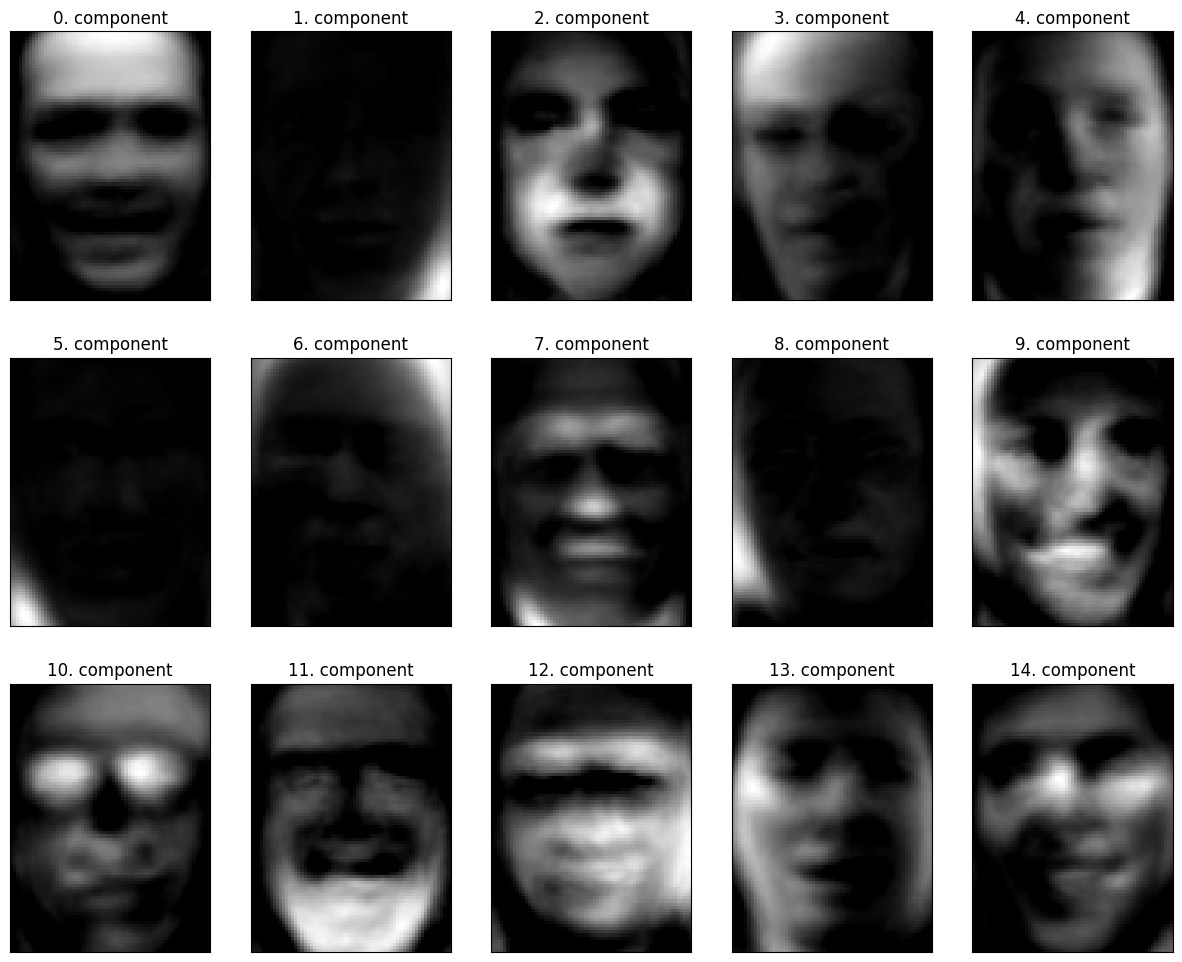

In [32]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

Because NMF components are non-negative, they resemble **face prototypes** rather than the abstract light/dark patterns of eigenfaces. Each component looks like a recognizable face or face part:

- **Component 3**: A face rotated slightly to the right.
- **Component 7**: A face rotated slightly to the left.
- Other components capture different face shapes, lighting conditions, and expressions.

This parts-based representation is much more interpretable than PCA. Each face is reconstructed as a non-negative sum of these prototype faces, where larger coefficients indicate greater similarity to that prototype.

#### Faces with High Activation for Specific Components

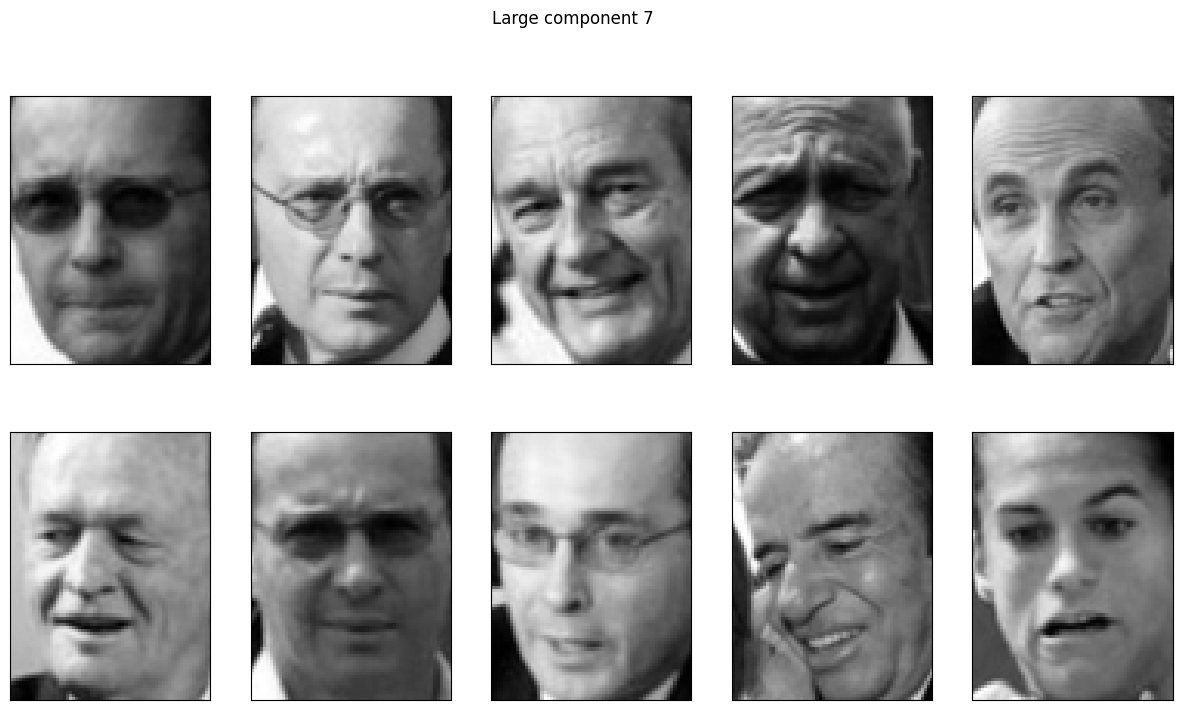

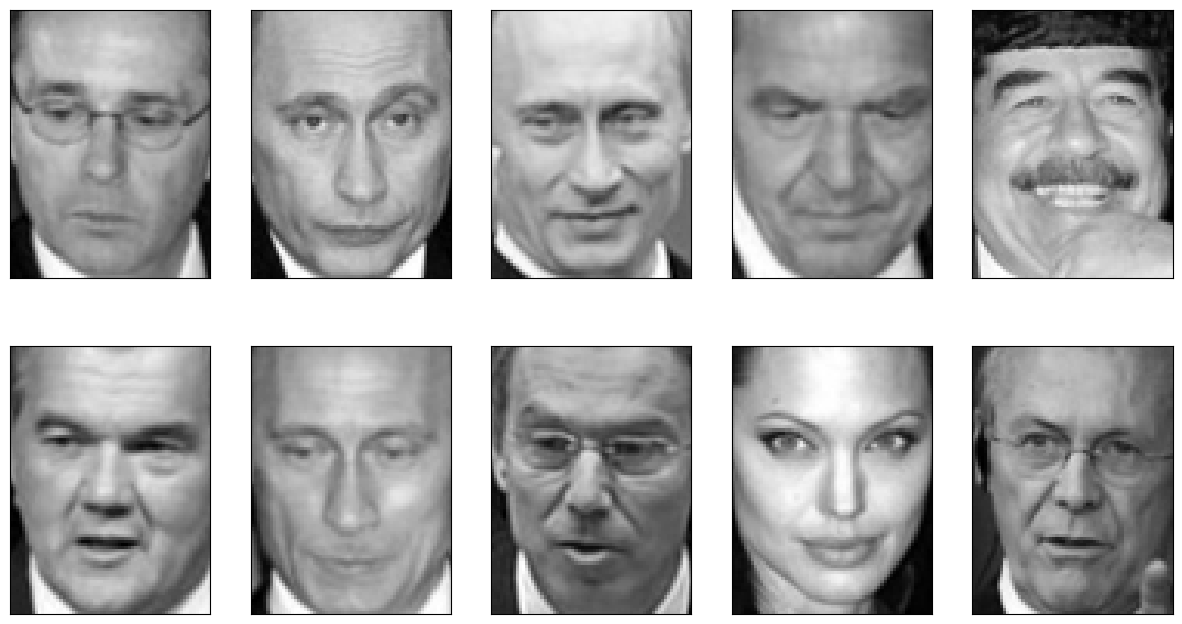

In [33]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

The results confirm the interpretation: faces with a high coefficient for component 3 are indeed looking to the right, while faces with a high coefficient for component 7 are looking to the left. NMF has discovered these pose patterns without any supervision.

This parts-based decomposition works best for data with **additive structure** -- where the observed data is a sum of independent sources. This makes NMF particularly effective for audio source separation, text topic modeling, and gene expression analysis.

#### NMF for Signal Recovery (Blind Source Separation)

A classic application: recovering individual source signals from a mixture. Suppose three independent signals are mixed together through 100 different "measurement devices":

Text(0.5, 1.0, 'Original source signals')

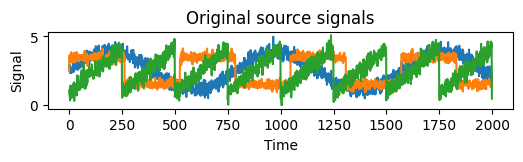

In [34]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.title("Original source signals")

In [35]:
# Mix data into a 100 dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


We observe 2,000 time points across 100 mixed channels. Our goal: recover the 3 original source signals from these 100 mixtures. We compare NMF and PCA:

In [36]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [37]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

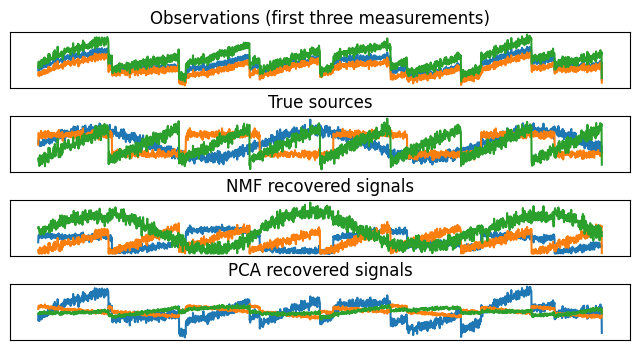

In [38]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

Comparing the recovery results:

- **NMF recovered signals**: Very close to the true sources. NMF successfully separates the mixture back into its original components (though the order and scale may differ). This works because the original signals are non-negative, and NMF's non-negativity constraint naturally guides it toward additive decomposition.

- **PCA recovered signals**: PCA fails to recover the original sources. It uses the first component to explain the majority of the variance, mixing all three sources together. PCA is designed to find orthogonal directions of maximum variance, which does not correspond to the original independent sources.

This demonstrates a key distinction: PCA finds the best low-rank approximation in terms of reconstruction error, while NMF finds a parts-based decomposition that often aligns with the physical sources of the data.

### 3.6 Manifold Learning with t-SNE

PCA is limited by its linearity: it can only capture patterns that are linear combinations of the original features. **Manifold learning** algorithms learn nonlinear mappings, often producing much better 2D visualizations.

**t-SNE** (t-distributed Stochastic Neighbor Embedding) is the most widely used manifold learning algorithm for visualization. Its objective:

1. Compute pairwise similarities between all points in the high-dimensional space (using Gaussian distributions).
2. Find a 2D arrangement of points that preserves these similarities as well as possible (using Student-t distributions).
3. Points that are close in the original space should remain close in 2D; points that are far apart should remain far apart.

t-SNE emphasizes preserving **local structure** (nearby points) more than global distances. This makes it excellent for visualizing clusters but less useful for preserving overall geometry.

Important limitations:
- t-SNE has **no `transform` method**. It can only embed the data it was trained on, not new unseen data.
- The axes of the t-SNE plot have no interpretable meaning.
- t-SNE is computationally expensive for large datasets.

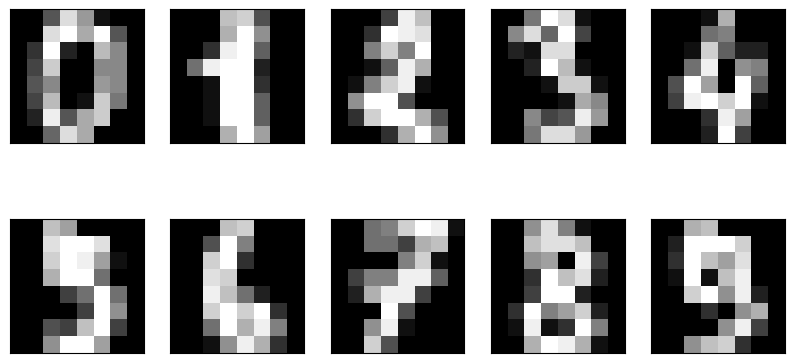

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

The digits dataset contains 1,797 images of handwritten digits (0-9), each 8x8 pixels (64 features). Let us compare PCA and t-SNE for visualizing this 10-class dataset.

#### PCA Visualization of Digits

Text(0, 0.5, 'Second principal component')

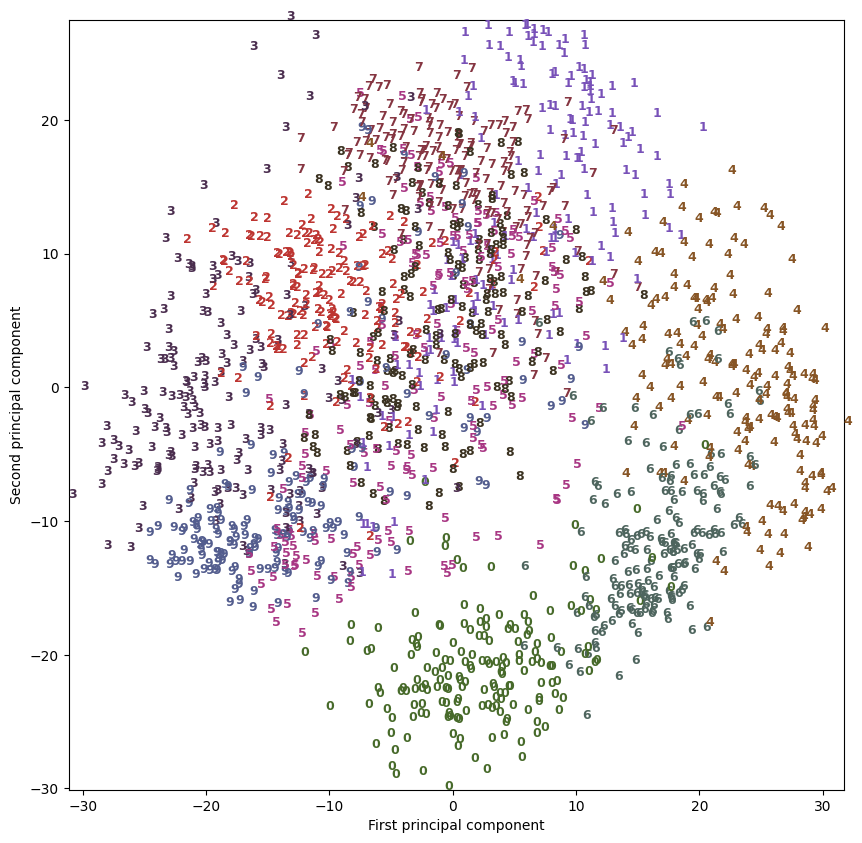

In [40]:
# Build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Using PCA, some digits are partially separated -- 0, 4, and 6 form somewhat distinct clusters. But most digits overlap heavily. With only two linear directions, PCA cannot adequately separate 10 classes in a 64-dimensional space.

The digit labels are used as plot symbols (instead of dots) so we can see which classes overlap. This is a visualization trick, not part of the PCA algorithm.

#### t-SNE Visualization of Digits

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
# t-SNE has no transform method, so we use fit_transform
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

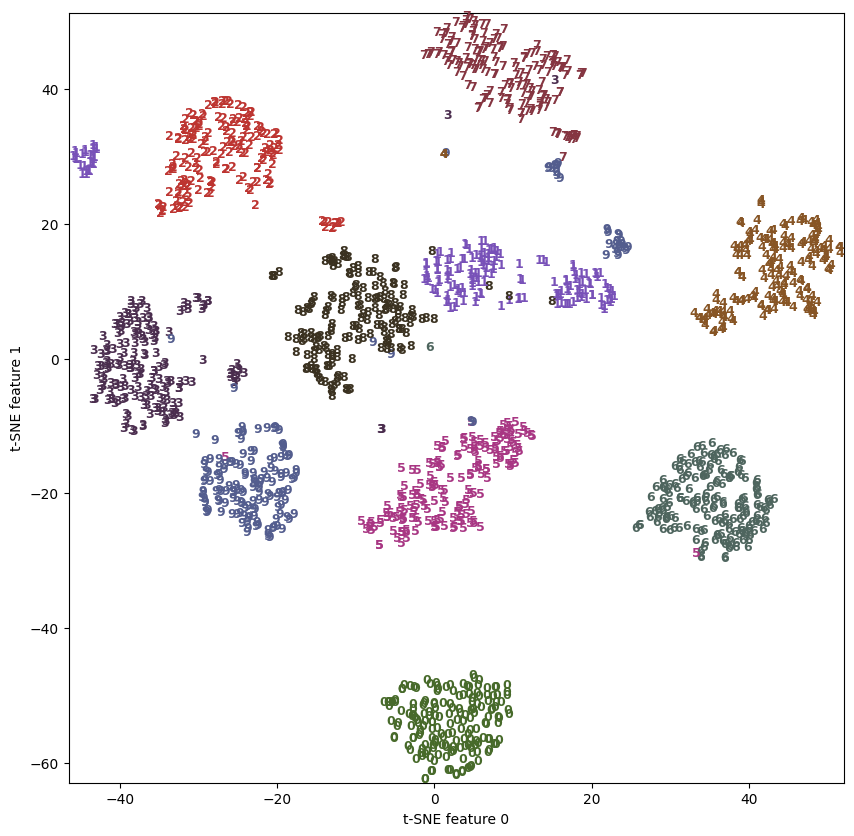

In [42]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

The t-SNE result is dramatically better than PCA. All ten digit classes form clearly separated, tight clusters. The 1s and 9s show some splitting (possibly due to stylistic variation in how people write these digits), but overall the separation is remarkable.

Key observations:
- t-SNE is **completely unsupervised** -- it has no knowledge of the digit labels. The clusters emerge purely from the structure of the pixel data.
- The relative positions of the clusters (e.g., which clusters are neighbors) carry some meaning -- digits that look similar (like 3, 5, 8) tend to be placed near each other.
- The absolute positions and distances between clusters are less meaningful and may change with different random seeds.
- t-SNE has tuning parameters (`perplexity` and `early_exaggeration`), but the default settings usually work well.

### 3.7 Dimensionality Reduction: Summary

| Method | Type | Key Property | Best For |
|--------|------|-------------|----------|
| **PCA** | Linear | Maximizes variance, orthogonal components | General-purpose compression, denoising, preprocessing |
| **NMF** | Linear, non-negative | Parts-based, additive decomposition | Images, audio, text (non-negative data) |
| **t-SNE** | Nonlinear | Preserves local neighborhood structure | Visualization only (2D scatter plots) |

Practical guidance:
- Start with **PCA** for preprocessing or initial exploration. It is fast, deterministic, and well-understood.
- Use **NMF** when your data is non-negative and you want interpretable components (e.g., topics in text, parts of faces).
- Use **t-SNE** for visualization when PCA does not show clear structure. Remember that t-SNE cannot transform new data.

## 4. Clustering

Clustering partitions a dataset into groups (**clusters**) such that points within the same cluster are similar and points in different clusters are dissimilar. Unlike classification, there are no predefined class labels -- the algorithm must discover the grouping structure on its own.

Clustering assigns each data point a cluster label (an integer), but these labels have no inherent meaning beyond grouping. The label "cluster 0" is not inherently different from "cluster 2" -- what matters is which points share the same label. Running the algorithm again might produce different numbering due to random initialization.

We cover three clustering algorithms, then discuss how to evaluate and compare them:

| Algorithm | How It Works | Key Parameter |
|-----------|-------------|---------------|
| **k-Means** | Assigns each point to the nearest cluster center | Number of clusters $k$ |
| **Agglomerative Clustering** | Merges the closest pair of clusters iteratively | Number of clusters or distance threshold |
| **DBSCAN** | Groups densely packed points; marks sparse regions as noise | Neighborhood radius $\varepsilon$ and minimum points |

### 4.1 k-Means Clustering

k-Means is the simplest and most widely used clustering algorithm. It tries to find $k$ cluster centers that are representative of certain regions of the data.

The algorithm alternates between two steps:

1. **Assignment step**: Assign each data point to the nearest cluster center:
$$c_i = \arg\min_{j \in \{1,\ldots,k\}} \|\mathbf{x}_i - \boldsymbol{\mu}_j\|^2$$

2. **Update step**: Recompute each cluster center as the mean of all points assigned to it:
$$\boldsymbol{\mu}_j = \frac{1}{|C_j|} \sum_{i \in C_j} \mathbf{x}_i$$

These steps repeat until the assignments no longer change. The algorithm minimizes the total within-cluster sum of squared distances (inertia):

$$J = \sum_{j=1}^{k} \sum_{i \in C_j} \|\mathbf{x}_i - \boldsymbol{\mu}_j\|^2$$

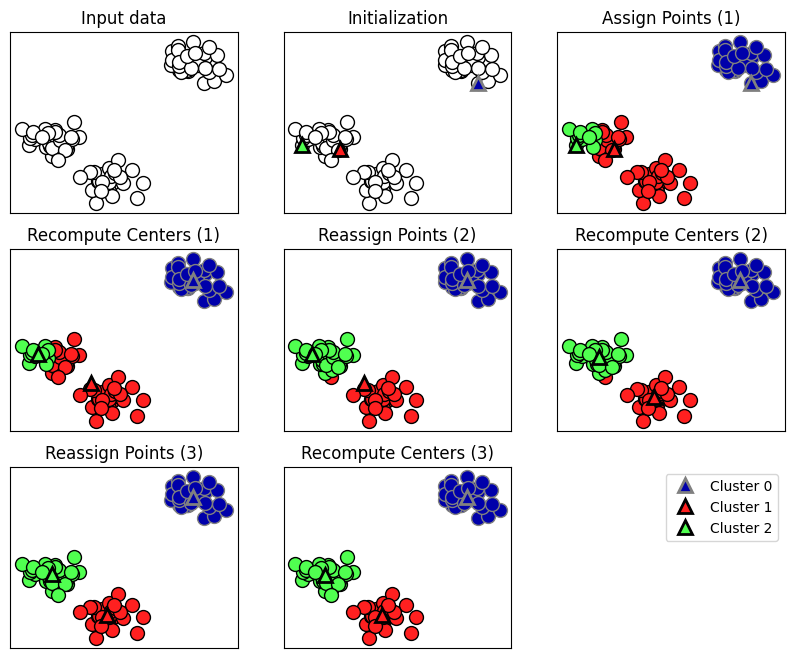

In [43]:
mglearn.plots.plot_kmeans_algorithm()

The figure shows the k-Means algorithm running on a 2D dataset with $k=3$:

- **Initialization**: Three cluster centers are placed (often randomly), shown as triangles.
- **Assign Points (1)**: Each data point is colored according to its nearest center. This creates a Voronoi partition of the space.
- **Recompute Centers (1)**: Each center moves to the mean of its assigned points.
- The process repeats for two more iterations. After the third iteration, the assignments no longer change and the algorithm stops.

Given new data points, k-Means will assign each to the closest cluster center. The following figure shows the Voronoi boundaries of the final cluster centers:

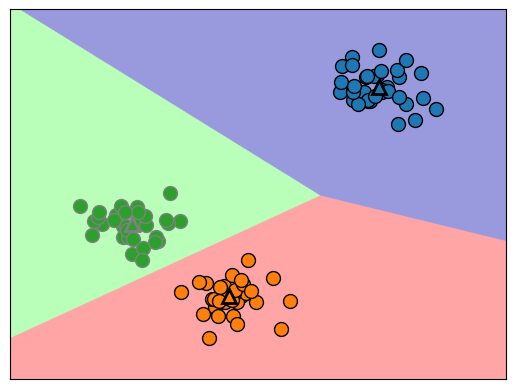

In [44]:
mglearn.plots.plot_kmeans_boundaries()

The Voronoi boundaries show the exact partition of the feature space. Every point in a region is assigned to the cluster whose center lies in that region. The boundaries are always straight lines (in 2D) or hyperplanes (in higher dimensions), because k-Means uses Euclidean distance.

This means k-Means assumes clusters are **convex** (roughly spherical) and of **similar size**. It will struggle with elongated, irregular, or differently-sized clusters.

#### Applying k-Means with scikit-learn

In [45]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


Each training data point is assigned a cluster label (0, 1, or 2), stored in `kmeans.labels_`. Since we asked for three clusters, the labels range from 0 to 2. These labels are arbitrary -- running the algorithm with a different random seed might swap which group is called "0" vs. "1".

In [46]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


The `predict` method assigns new points to the nearest cluster center. When called on the training data, it returns the same result as `labels_`. Unlike agglomerative clustering and DBSCAN, k-Means **can** predict cluster labels for unseen data points.

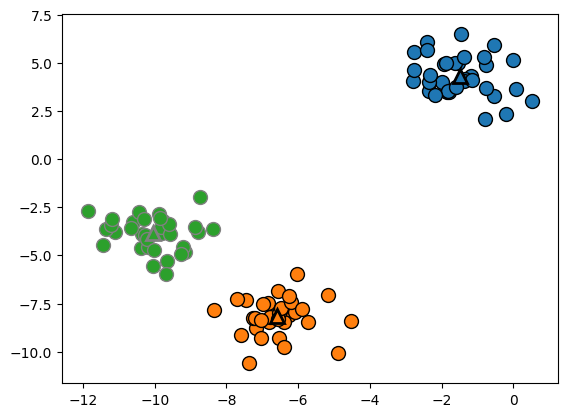

In [47]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)

The scatter plot shows the three discovered clusters with their centers (triangles). The cluster centers are stored in the `cluster_centers_` attribute. On this well-separated blob dataset, k-Means correctly identifies the natural grouping.

We can also use more or fewer cluster centers:

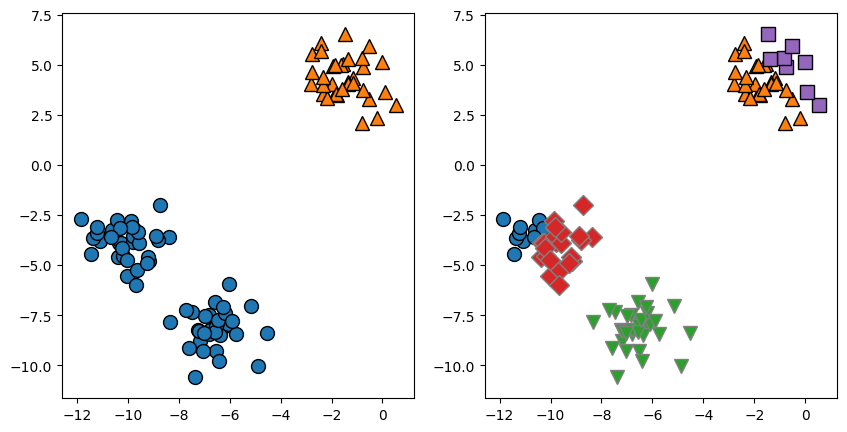

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

When $k$ does not match the true number of groups:

- **$k=2$**: Two natural clusters are merged into one. The algorithm is forced to draw a boundary through a natural group.
- **$k=5$**: Some natural clusters are split into multiple pieces. The algorithm creates artificial subdivisions.

Choosing the right $k$ is one of the main challenges of k-Means.

#### Failure Cases of k-Means

Even with the "right" number of clusters, k-Means can fail because each cluster is defined solely by its center. This means:
- Each cluster is a **convex** shape (no crescents, rings, or elongated groups).
- k-Means assumes all clusters have roughly the same "diameter."
- k-Means assumes all directions are equally important for each cluster.

**Failure 1: Clusters with different densities**

Text(0, 0.5, 'Feature 1')

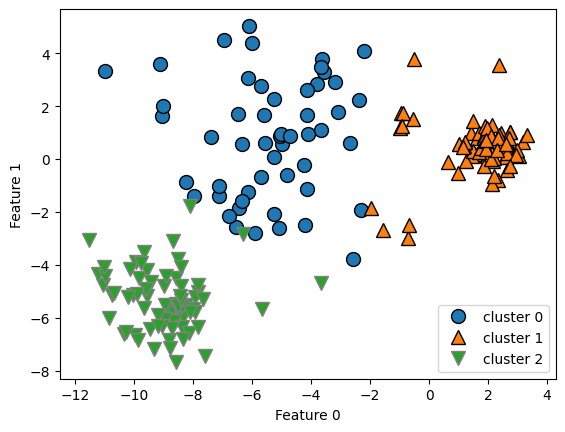

In [49]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The three blobs were generated with different standard deviations (1.0, 2.5, and 0.5). One might expect the dense region in the lower left, the dense region in the upper right, and the diffuse region in the center to be the three clusters. Instead, k-Means draws boundaries equidistant between centers, so points from the diffuse center cluster "reach" into the compact clusters. The algorithm cannot account for the fact that one cluster is much more spread out than the others.

**Failure 2: Non-spherical (elongated) clusters**

Text(0, 0.5, 'Feature 1')

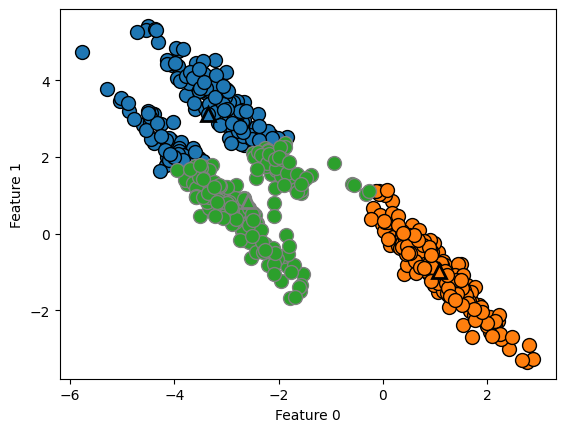

In [50]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The data has three clearly separated elongated groups stretched along a diagonal direction. k-Means assigns points based solely on distance to the nearest center, producing boundaries that cut through the natural diagonal clusters. It cannot capture the fact that these clusters are elongated in one direction.

**Failure 3: Non-convex (complex) shapes**

Text(0, 0.5, 'Feature 1')

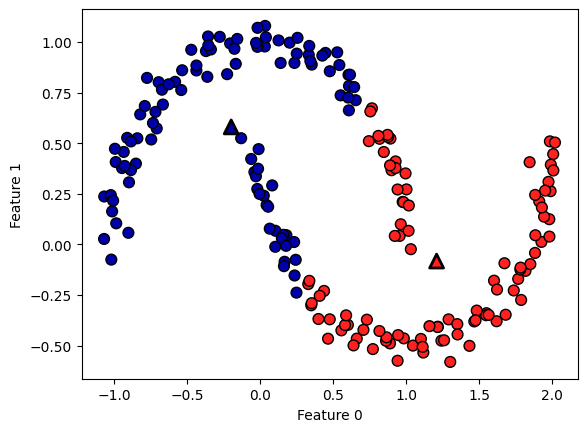

In [51]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The two crescent-shaped clusters cannot be separated by a straight line (or by proximity to a single center). k-Means cuts them with a vertical boundary, assigning parts of each moon to the wrong cluster. Algorithms like DBSCAN, which use density connectivity rather than distance to centers, handle such shapes correctly.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

Text(0, 0.5, 'nmf')

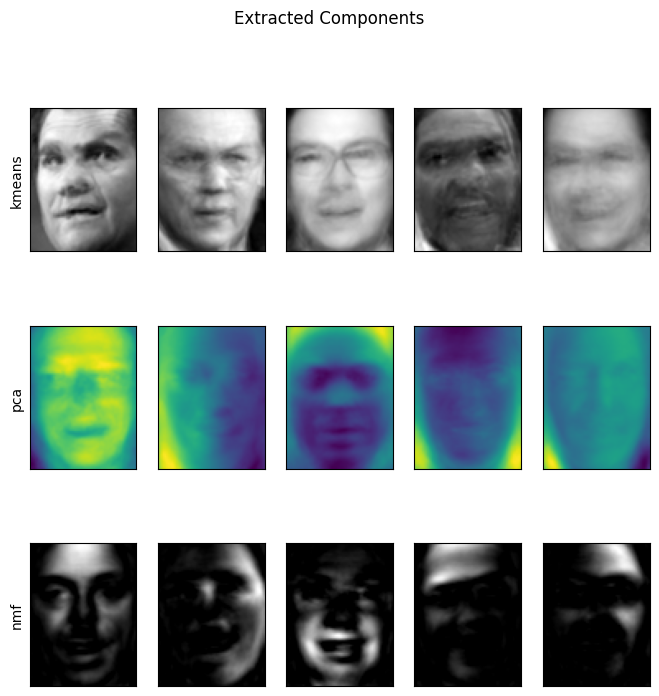

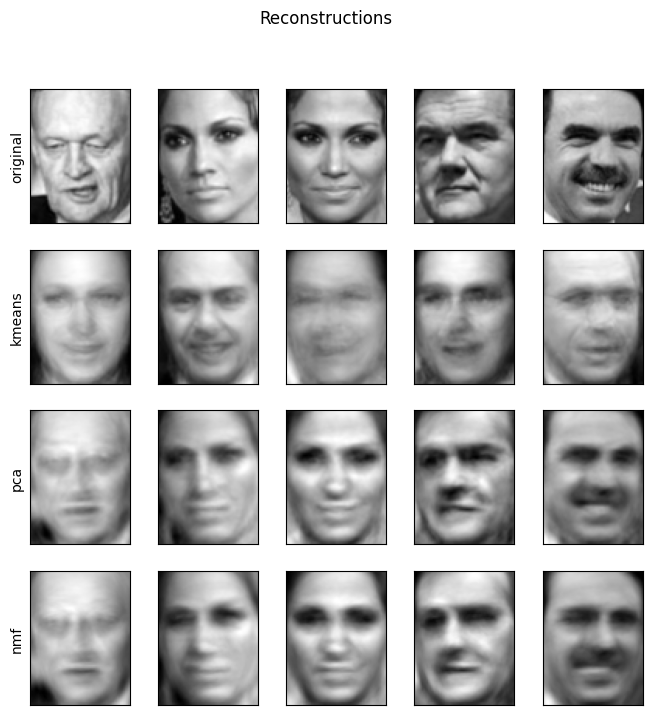

In [53]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

The figures above compare the components extracted by k-Means (cluster centers), PCA, and NMF with 100 components each, as well as face reconstructions from the test set. For k-Means, the "reconstruction" is simply the nearest cluster center. PCA produces smooth reconstructions that capture the overall face structure, while NMF produces parts-based components. The k-Means centers are actual face-like prototypes (averages of cluster members).

#### Vector Quantization: k-Means as Decomposition

There is an interesting parallel between k-Means and decomposition methods like PCA and NMF:

| Method | Representation of each data point |
|--------|----------------------------------|
| **PCA** | Weighted sum of all components (many nonzero weights) |
| **NMF** | Non-negative weighted sum of all components |
| **k-Means** | Represented by **a single** cluster center (one-hot encoding) |

k-Means can be viewed as an extreme form of decomposition where each data point is represented using only one component -- the nearest cluster center. This view is called **vector quantization**.

This is useful because k-Means can create a high-dimensional representation even from low-dimensional data. On the two-moons data (2D), we can use many cluster centers to encode the data into a richer feature space:

Cluster memberships:
[8 4 6 3 1 1 5 2 8 4 9 2 1 4 7 5 0 2 0 7 1 2 0 4 9 6 1 1 6 0 8 9 2 6 8 1 2
 5 3 6 2 7 8 6 4 9 5 7 6 2 7 2 1 3 4 8 0 4 0 9 2 3 1 8 4 3 9 4 9 3 2 3 2 6
 2 3 6 8 0 2 1 9 2 1 6 9 5 9 2 1 0 5 1 7 1 1 4 2 3 6 4 1 9 5 3 6 3 7 4 0 7
 9 9 3 8 4 8 1 2 8 8 7 6 9 6 7 5 6 4 1 5 7 3 6 4 4 4 3 1 8 6 6 0 9 7 5 6 4
 0 6 2 4 8 0 2 9 4 2 0 0 6 4 0 4 2 1 0 2 4 2 0 3 3 7 6 2 1 7 7 0 4 3 1 4 1
 0 9 2 3 7 3 0 8 5 6 7 1 6 9 4]


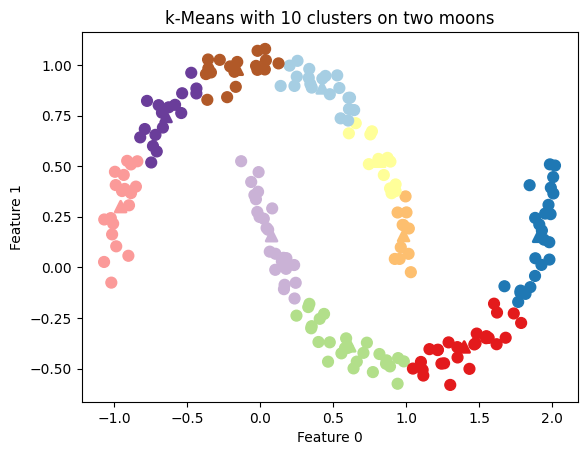

In [54]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("k-Means with 10 clusters on two moons")
print("Cluster memberships:\n{}".format(y_pred))

With 10 cluster centers, each point is now assigned a number between 0 and 9. This can be viewed as a 10-dimensional one-hot representation (all zeros except for the assigned cluster). In this higher-dimensional space, a linear model could now separate the two half-moon shapes -- something impossible in the original 2D space.

An even richer representation uses the **distances** to each cluster center as features:

In [55]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.53664613 1.15017588 0.93237626 ... 1.48034956 0.002907   1.07736639]
 [1.74138152 0.60592307 1.00666225 ... 2.52921971 1.20779969 2.23716489]
 [0.75710543 1.93145038 0.91586549 ... 0.78321505 0.87573753 0.71838465]
 ...
 [0.9274342  1.73811046 0.57899268 ... 1.11471941 0.83358544 1.04125672]
 [0.3227627  1.97647071 1.47861069 ... 0.81425026 0.84551232 0.28446737]
 [1.63322944 0.47226506 1.02289983 ... 2.46626118 1.09767675 2.14812753]]


The `transform` method returns a matrix of shape `(200, 10)` -- each row contains the distance from that point to each of the 10 cluster centers. This distance-based representation is continuous (not one-hot) and provides even more information for downstream algorithms.

k-Means is popular because it is fast, simple to understand, and scales well to large datasets. scikit-learn includes `MiniBatchKMeans` for very large datasets. The main drawbacks are: reliance on random initialization (mitigated by running 10 initializations by default), restrictive assumptions on cluster shape, and the need to specify $k$ in advance.

### 4.2 Agglomerative Clustering

Agglomerative clustering is a **bottom-up** (hierarchical) approach:

1. Start with each data point as its own cluster ($n$ clusters).
2. Find the two most similar clusters and merge them ($n-1$ clusters).
3. Repeat until only $k$ clusters remain.

The key decision: how to measure the distance between two clusters. Common **linkage criteria**:

| Linkage | Distance Between Clusters A and B | Effect |
|---------|----------------------------------|--------|
| **ward** (default) | Increase in total within-cluster variance after merging | Tends to produce equally sized, compact clusters |
| **complete** | Maximum distance between any pair of points in A and B | Produces more compact clusters |
| **average** | Mean distance between all pairs of points in A and B | Balanced approach |

Ward linkage works well on most datasets and is the default choice. If clusters have very different sizes, average or complete linkage might work better.

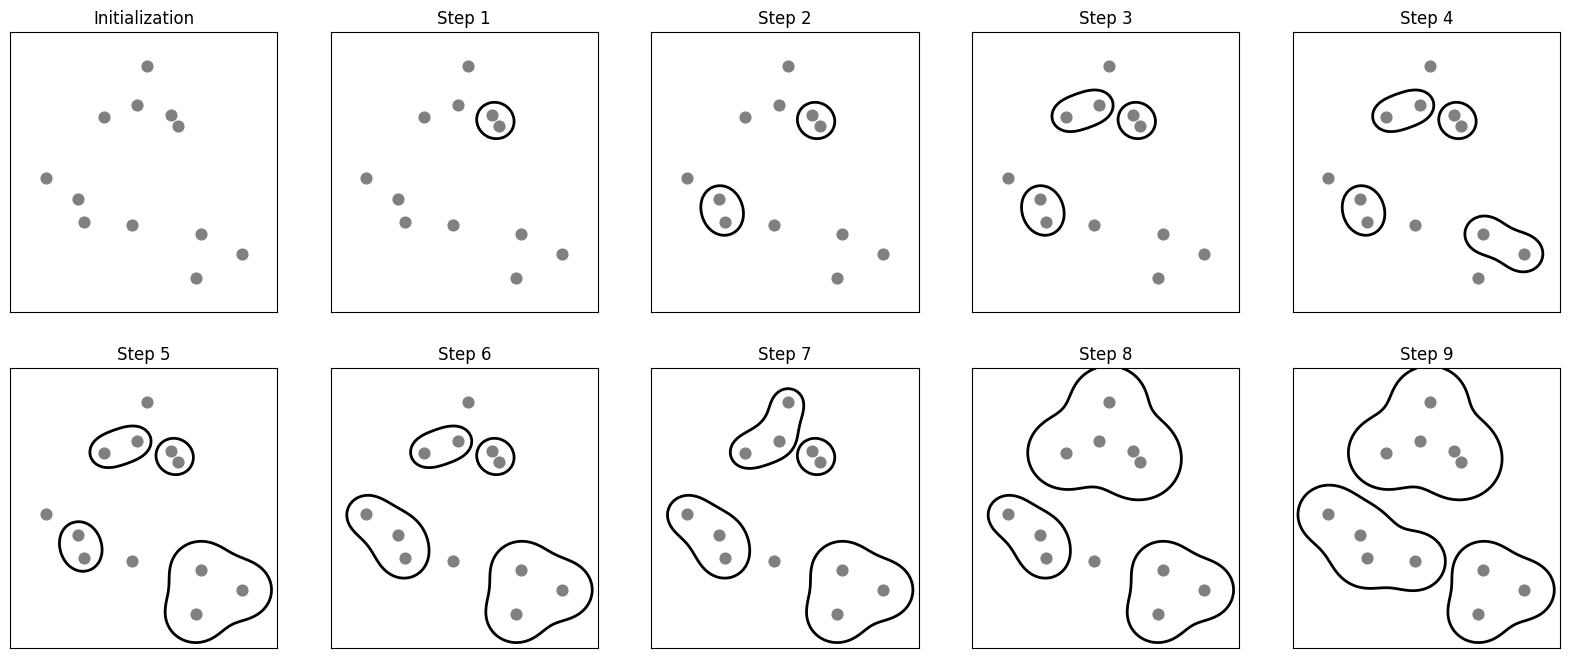

In [56]:
mglearn.plots.plot_agglomerative_algorithm()

The figure shows the agglomerative clustering process step by step. Initially, each point is its own cluster. In each step, the two closest clusters (under the ward linkage criterion) are merged. In the first four steps, single-point clusters are joined into two-point clusters. By step 9, only three clusters remain, so the algorithm stops.

Unlike k-Means, agglomerative clustering **cannot make predictions for new data points**. It has no `predict` method. To get cluster labels, use `fit_predict`:

Text(0, 0.5, 'Feature 1')

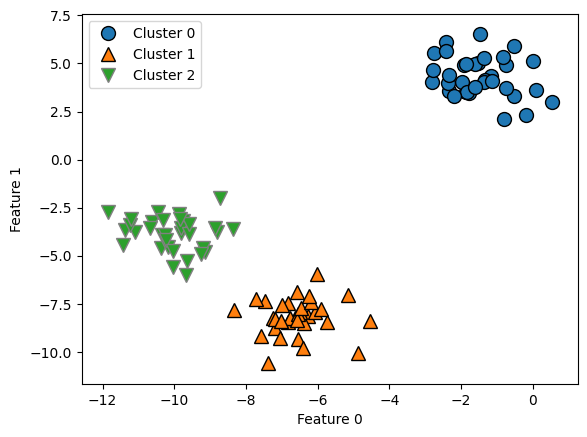

In [57]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["Cluster 0", "Cluster 1", "Cluster 2"], loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

On the blob dataset, agglomerative clustering with ward linkage correctly recovers all three clusters, producing the same result as k-Means.

#### Hierarchical Clustering and Dendrograms

Agglomerative clustering produces a **hierarchical clustering**: the merging process creates a nested sequence of partitions, from $n$ clusters (each point alone) down to 1 cluster (all points together). Every intermediate step provides a valid clustering with a different number of clusters.

The following figure shows an overlay of all possible clusterings:

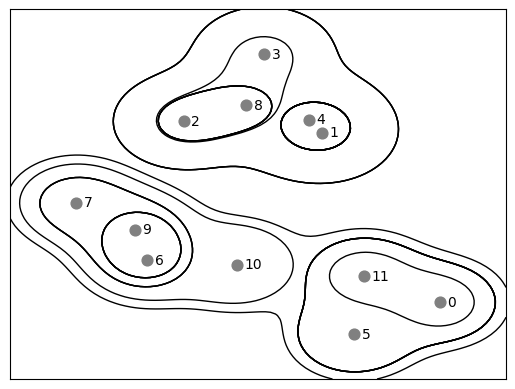

In [58]:
mglearn.plots.plot_agglomerative()

While this overlay provides a detailed view, it relies on the 2D nature of the data. For higher-dimensional data, we use a **dendrogram** -- a tree diagram that shows the merge history regardless of dimensionality.

The dendrogram is generated using SciPy's `ward` and `dendrogram` functions:

Text(0, 0.5, 'Cluster distance')

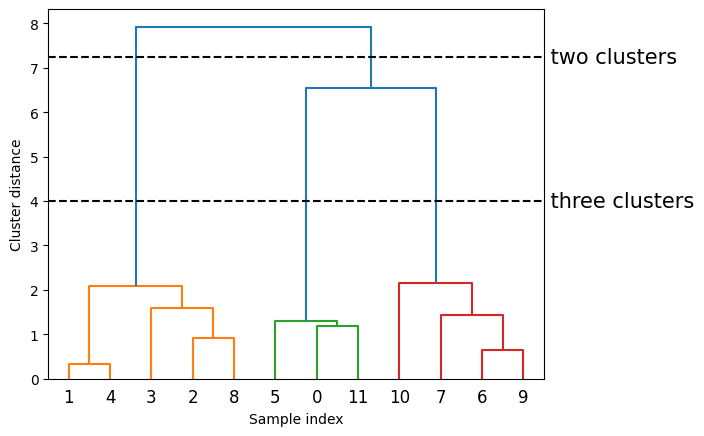

In [59]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# Apply ward clustering to the data array
linkage_array = ward(X)

# Plot the dendrogram
dendrogram(linkage_array)

# Mark the cuts for two and three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

The dendrogram is read from bottom to top:

- At the **bottom**, each sample is its own cluster (12 clusters for 12 samples).
- At each **horizontal line**, two clusters merge. The **height** (y-axis) indicates the distance between the merged clusters.
- **Longer branches** mean larger distances between the merged clusters. The three longest branches (marked by the dashed "three clusters" line) indicate that going from three to two clusters requires merging very dissimilar groups.
- A **horizontal cut** at any height produces a specific number of clusters. Cutting at height 7.25 gives 2 clusters; cutting at height 4 gives 3 clusters.

The dendrogram provides a complete picture of the hierarchical structure, allowing you to choose the number of clusters **after** examining the data rather than before. Look for the longest vertical gaps in the dendrogram -- these suggest natural cluster boundaries.

### 4.3 DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) defines clusters as **dense regions** of data separated by sparser regions. Its main advantages:
- Does not require specifying the number of clusters in advance.
- Can find clusters of arbitrary shape.
- Can identify noise points (outliers) that do not belong to any cluster.

**Two parameters**:
- **`eps` ($\varepsilon$)**: Maximum distance between two points for them to be considered neighbors.
- **`min_samples`**: Minimum number of points within distance $\varepsilon$ to form a dense region.

**Three types of points**:

| Point Type | Definition | Cluster Role |
|------------|-----------|-------------|
| **Core point** | Has $\geq$ `min_samples` neighbors within $\varepsilon$ | Forms the "backbone" of a cluster |
| **Border point** | Within $\varepsilon$ of a core point but not itself core | Assigned to a neighboring core point's cluster |
| **Noise point** | Neither core nor border | Labeled as $-1$, belongs to no cluster |

**Algorithm**:
1. Pick an unvisited point. Count its neighbors within $\varepsilon$.
2. If it has $\geq$ `min_samples` neighbors, label it a core point and start a new cluster.
3. Recursively visit all neighbors of core points, expanding the cluster.
4. If the starting point has fewer than `min_samples` neighbors, label it as noise.
5. Repeat until all points are visited.

The clustering of core points is deterministic. Border points (near multiple clusters) may be assigned differently depending on visit order, but this is rare in practice.

In [60]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


With default parameters (`eps=0.5`, `min_samples=5`), all points are labeled $-1$ (noise). This is because the default `eps` is too small for this toy dataset -- no point has 5 neighbors within distance 0.5. This illustrates that DBSCAN parameters must be tuned to the data's scale.

Let us see how different parameter values affect the clustering:

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


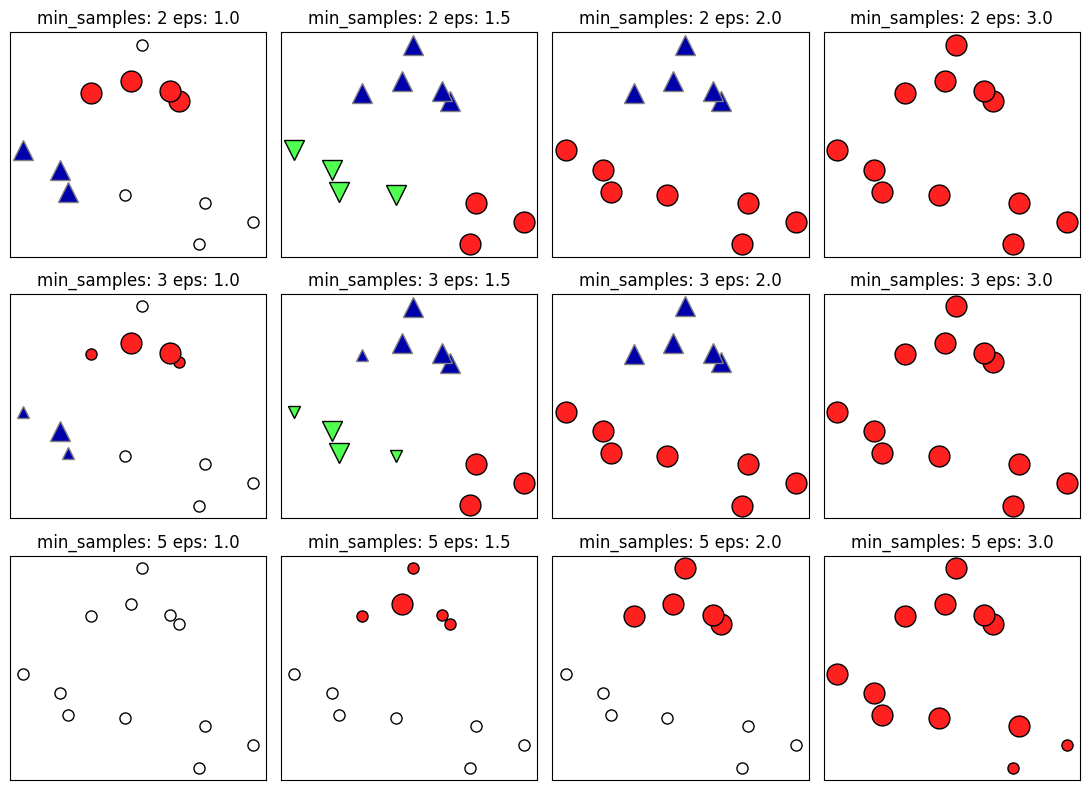

In [61]:
mglearn.plots.plot_dbscan()

The figure shows DBSCAN with varying `min_samples` (rows) and `eps` (columns). Core points are shown as large markers, border points as small markers, and noise points in white.

Key observations:

- **Increasing `eps`** (left to right): More points become neighbors, clusters grow, and separate clusters may merge into one.
- **Increasing `min_samples`** (top to bottom): Fewer points qualify as core points, more points become noise, and the minimum cluster size increases.
- **`eps` is the more important parameter**: It directly controls what "close" means. Too small and everything is noise; too large and everything merges into one cluster.
- **`min_samples` controls minimum cluster size**: Going from `min_samples=3` to `min_samples=5` with `eps=1.5`, the two smaller clusters (with 3 and 4 points) become noise because they are below the minimum size threshold.

Scaling the data with StandardScaler or MinMaxScaler before applying DBSCAN is recommended, as it ensures all features have similar ranges, making `eps` easier to tune.

#### DBSCAN on Two Moons

Where k-Means failed on the crescent-shaped data, DBSCAN succeeds:

Text(0, 0.5, 'Feature 1')

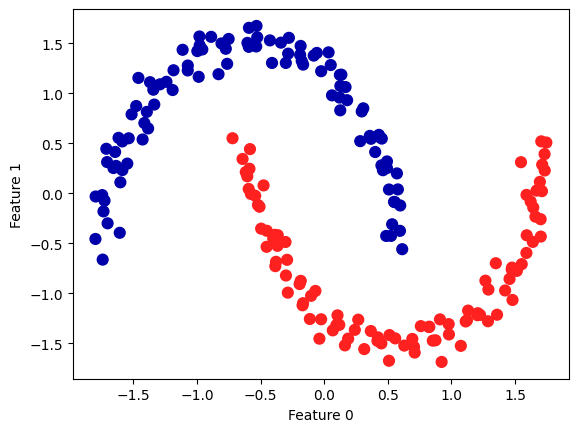

In [62]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With default parameters (`eps=0.5`) on scaled data, DBSCAN perfectly separates the two half-moons. It succeeds because it uses **density connectivity**: two points are in the same cluster if they can be connected through a chain of core points, regardless of overall cluster shape.

Like agglomerative clustering, DBSCAN has **no `predict` method** for new data. Be careful when using the returned labels: the $-1$ noise label can cause unexpected behavior if used to index arrays.

### 4.4 Comparing and Evaluating Clustering Algorithms

Evaluating clustering is fundamentally harder than evaluating supervised learning. Without ground truth labels, how do we know if the algorithm found meaningful structure?

We discuss two scenarios:
1. **With ground truth**: Use metrics like ARI (Adjusted Rand Index) and NMI (Normalized Mutual Information).
2. **Without ground truth**: Use metrics like the silhouette score, or resort to manual inspection.

#### Evaluating with Ground Truth: Adjusted Rand Index (ARI)

The ARI measures how well a clustering matches known labels, yielding a score between 0 (random) and 1 (perfect match). Importantly, ARI is **permutation-invariant** -- it does not matter which cluster gets which label number.

Let us compare k-Means, Agglomerative Clustering, and DBSCAN on the two-moons dataset, where we know the true labels:

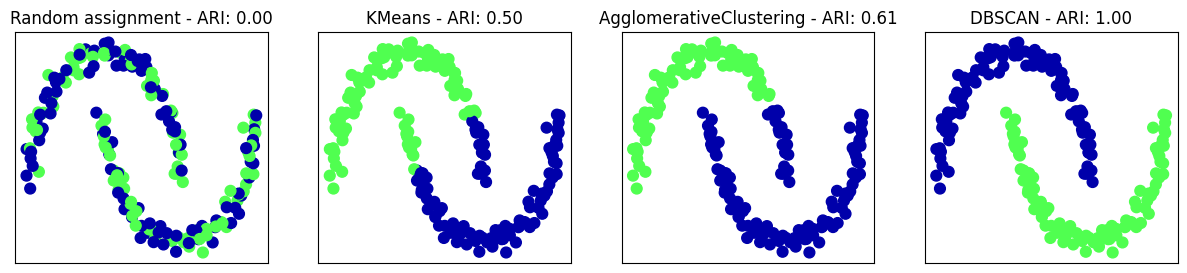

In [63]:
from sklearn.metrics.cluster import adjusted_rand_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# List of algorithms
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# Random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# Plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                            adjusted_rand_score(y, clusters)))

The results clearly show the relative quality of each approach:

| Method | ARI | Interpretation |
|--------|-----|---------------|
| Random assignment | ~0.00 | No better than chance |
| k-Means | ~0.48 | Partially captures the structure but cannot handle non-convex shapes |
| Agglomerative | ~0.48 | Similar limitation to k-Means with ward linkage |
| DBSCAN | **1.00** | Perfectly recovers the ground truth clustering |

DBSCAN achieves a perfect score because it uses density connectivity, which naturally follows the crescent shapes.

#### Why Not Use Accuracy?

A common mistake is to use `accuracy_score` instead of `adjusted_rand_score` to evaluate clustering. The problem: accuracy requires cluster labels to exactly match the ground truth labels, but cluster labels are arbitrary:

In [64]:
from sklearn.metrics import accuracy_score

# These two labelings correspond to the SAME clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# Accuracy is zero because labels are swapped
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# ARI correctly recognizes they are the same clustering
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


The two labelings group the same points together -- they represent identical clusterings. But accuracy reports 0.00 because the label numbers are swapped (0 and 1 are exchanged). ARI correctly reports 1.00 because it only cares about which points share a label, not what the label number is. Always use ARI or NMI, never accuracy, for clustering evaluation.

#### Evaluating without Ground Truth: Silhouette Score

In practice, there is usually no ground truth to compare against. The **silhouette score** provides an unsupervised metric based on cluster compactness and separation. For each point, it computes:

$$s_i = \frac{b_i - a_i}{\max(a_i, b_i)}$$

where $a_i$ is the mean distance to other points in the same cluster and $b_i$ is the mean distance to points in the nearest other cluster. The score ranges from $-1$ (badly clustered) to $+1$ (well-separated clusters). The overall silhouette score is the mean across all points.

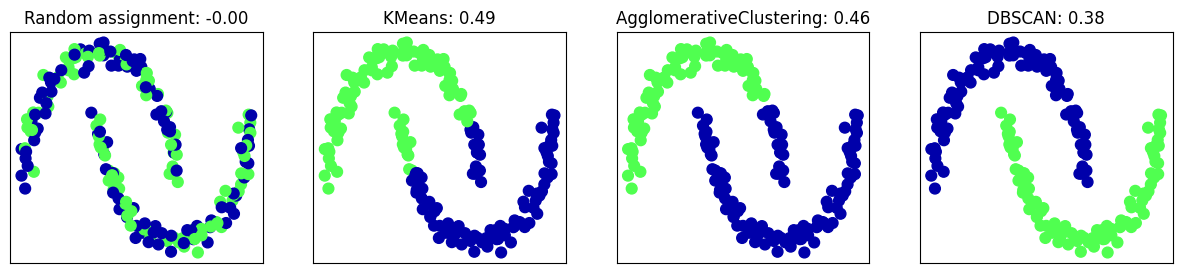

In [65]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# Random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{}: {:.2f}".format(algorithm.__class__.__name__,
                                     silhouette_score(X_scaled, clusters)))

Here we see a critical limitation of the silhouette score: **k-Means gets the highest silhouette score** even though DBSCAN produces the more meaningful clustering. This happens because the silhouette score rewards compact, spherical clusters. The two half-moons, while clearly separated by density, are not "compact" in the Euclidean sense -- points at opposite ends of the same moon are far apart.

This illustrates an important principle: **no single metric perfectly captures clustering quality.** Unsupervised evaluation metrics measure geometric properties (compactness, separation) that may not align with the semantic grouping you want. Manual inspection remains essential.

More robust strategies include:
- Running the algorithm with different parameters and checking if the same clusters emerge consistently.
- Visual inspection of cluster contents.
- Using domain knowledge to assess whether the clusters are meaningful.

### 4.5 Comparing Algorithms on the Faces Dataset

Let us apply all three clustering algorithms to the Labeled Faces in the Wild dataset and see if any of them find interesting structure. We work in the PCA-reduced eigenface representation with 100 components, which provides a more semantic (and computationally efficient) representation than raw pixels.

(Note: The following cells require the `people`, `X_people`, `y_people`, and `image_shape` variables from the LFW face dataset loaded in Section 3.4.)

In [66]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

#### Analyzing Faces with DBSCAN

DBSCAN is our first approach. Its ability to detect noise points can help identify unusual images:

In [67]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


All points are labeled $-1$ (noise) with default parameters. The default `eps=0.5` is far too small for the 100-dimensional PCA space. Let us try adjusting parameters:

In [68]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [69]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


Even with `min_samples=3`, the default `eps` is too small. With `eps=15`, we get one large cluster and some noise points. Let us examine the noise points -- they should be the most unusual face images:

In [70]:
# Count points in each cluster (bincount needs non-negative, so add 1)
print("Number of points per cluster:", np.bincount(labels + 1))

Number of points per cluster: [  37 2026]


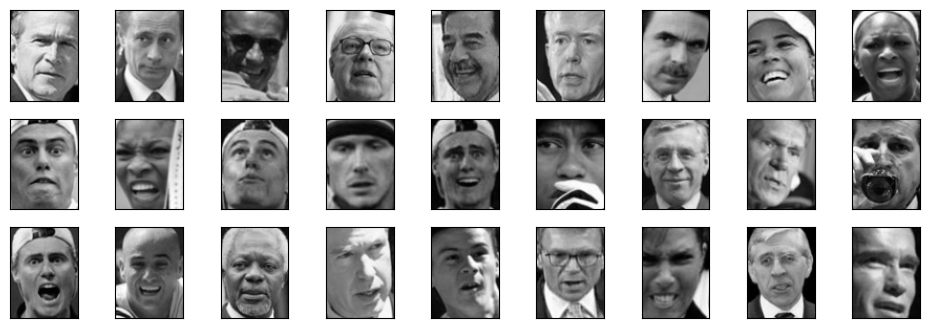

In [71]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

The noise images are notably different from typical face photos: some show people drinking from glasses, wearing hats, with hands in front of faces, or with unusual crops and angles. This kind of analysis -- finding "the odd one out" -- is called **outlier detection** and is one of DBSCAN's unique strengths.

Let us explore which `eps` values produce more interesting clusterings:

In [72]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Number of clusters: {}".format(len(np.unique(labels))))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [2063]

eps=3
Number of clusters: 1
Cluster sizes: [2063]

eps=5
Number of clusters: 2
Cluster sizes: [2059    4]

eps=7
Number of clusters: 8
Cluster sizes: [1954   75    4   14    6    4    3    3]

eps=9
Number of clusters: 3
Cluster sizes: [1199  861    3]

eps=11
Number of clusters: 2
Cluster sizes: [ 403 1660]

eps=13
Number of clusters: 2
Cluster sizes: [ 119 1944]


The results reveal important structure in the data:

- **eps=1 to 5**: All points are noise -- `eps` is still too small.
- **eps=7**: Many small clusters (13 clusters) and many noise points (2006). This is the most granular meaningful clustering.
- **eps=9**: One big cluster (788 points) and two tiny clusters, with 1269 noise points.
- **eps=11 to 13**: One big cluster grows to absorb most points, with decreasing noise.

A key observation: **there is never more than one large cluster.** This suggests that faces in this dataset do not fall into two or three clearly distinct groups. Instead, all images are more or less equally similar to each other, with only small subgroups of particularly similar faces.

Let us examine the 13 small clusters found at `eps=7`:

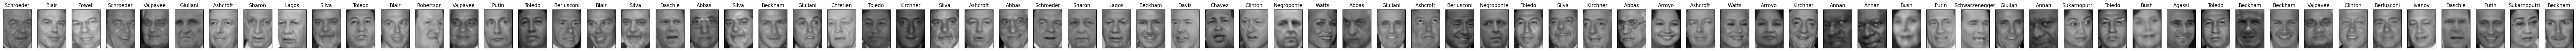

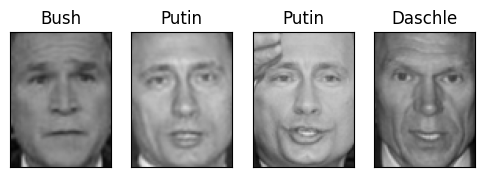

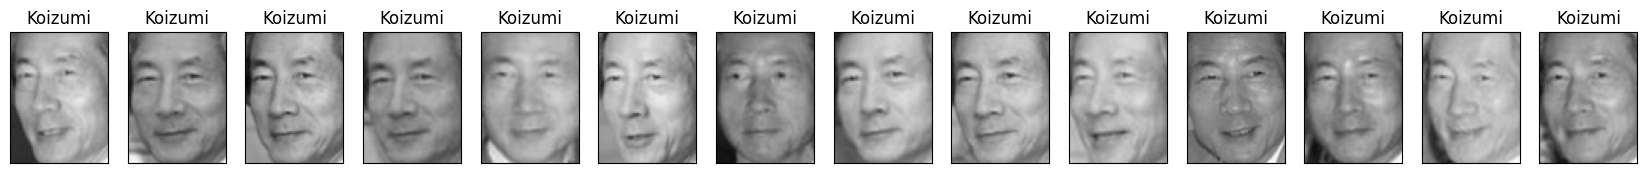

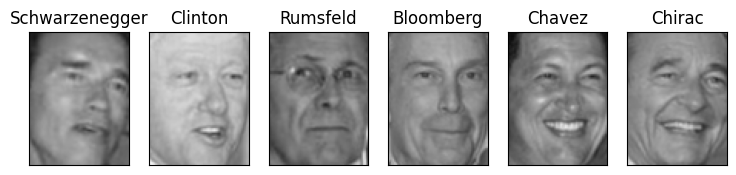

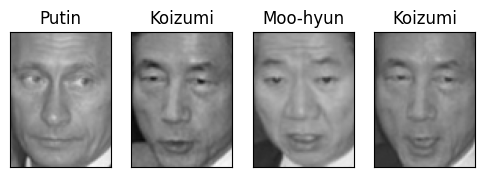

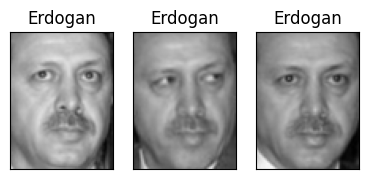

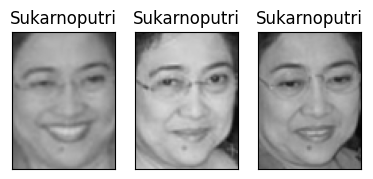

In [73]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images =  np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):

        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

The small clusters discovered by DBSCAN tend to group:
- Faces of the same person with very consistent pose and expression.
- Faces from different people that share similar orientation, lighting, and expression.

Within each cluster, the face orientation and expression are quite consistent. This is the nature of DBSCAN clustering on face data: it finds pockets of very high similarity rather than broad semantic categories.

#### Analyzing Faces with k-Means

k-Means and agglomerative clustering produce more evenly sized clusters. Let us use $k=10$ to allow manual inspection of each cluster:

In [74]:
# extract clusters with k-Means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [  5 286 190 275 185 493   1 286   2 340]


k-Means produces relatively equally sized clusters (from about 64 to 386 members), very different from DBSCAN's one-large-cluster-plus-noise pattern.

We can visualize the cluster centers by projecting them back to pixel space using `pca.inverse_transform`:

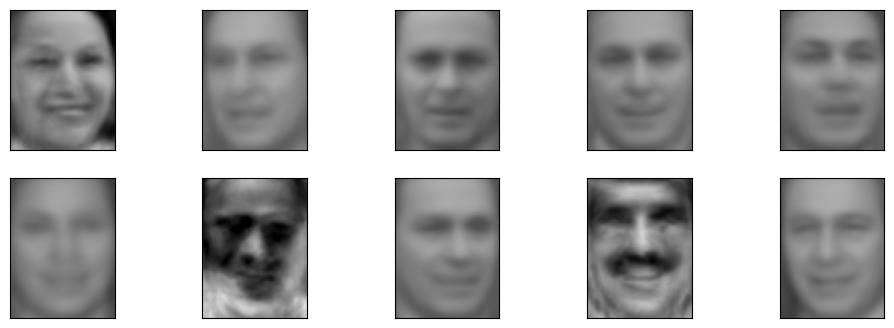

In [75]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

The cluster centers are smooth, averaged versions of faces. Each center represents the "average face" of its cluster members. The smoothness comes from averaging over 64-386 images and working in the 100-component PCA space.

The centers capture distinct characteristics: different face orientations, expressions (one center appears to show a smiling face), and even clothing features (some centers show shirt collars).

For a more detailed view, we can show the most typical and most atypical faces in each cluster:

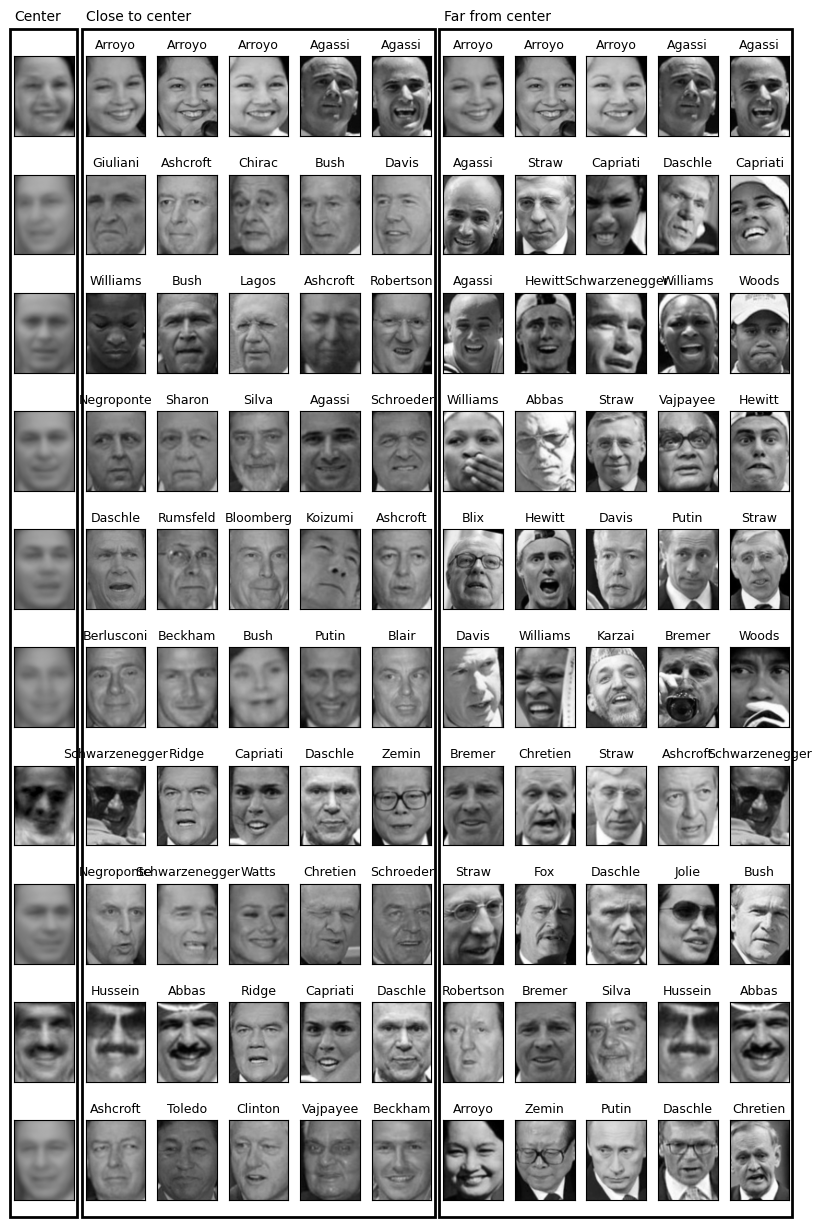

In [76]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

For each cluster, the top row shows the 5 faces closest to the cluster center (most typical), and the bottom row shows the 5 faces farthest from the center (most atypical, but still assigned to this cluster).

The typical faces confirm the patterns visible in the cluster centers. The atypical faces often look quite different from the center -- their assignment seems somewhat arbitrary. This is a fundamental limitation of k-Means: it assigns every point to some cluster even when points do not clearly belong anywhere. Unlike DBSCAN, k-Means has no concept of "noise" points.

#### Analyzing Faces with Agglomerative Clustering

In [77]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(
       np.bincount(labels_agg)))

cluster sizes agglomerative clustering: [264 100 275 553  49  64 546  52  51 109]


Agglomerative clustering also produces relatively even clusters, but with more variation in size (26 to 623) compared to k-Means. Let us check how similar the two partitions are:

In [78]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


An ARI of only about 0.13 means the two clusterings have little in common. This is not surprising -- points far from any cluster center can be assigned differently by each algorithm, and there is no single "correct" partition of face images into 10 groups.

The dendrogram can help us understand the hierarchical structure:

Text(0, 0.5, 'Cluster distance')

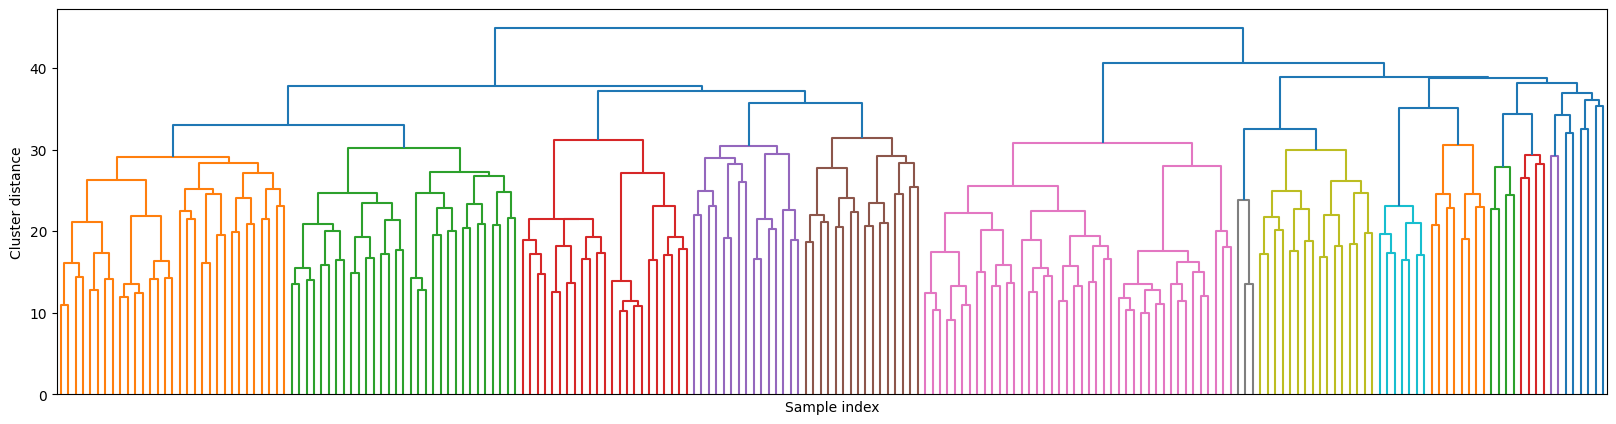

In [79]:
linkage_array = ward(X_pca)
# now we plot the dendrogram for the linkage_array
# containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

The dendrogram is truncated at level 7 for readability (showing the full 2,000+ leaf structure would be unreadable). To get 10 clusters, we cut across the tree near the very top where there are 10 vertical lines.

There is no obvious "natural" number of clusters -- no single level shows dramatically longer branches than others. This is consistent with the DBSCAN finding: the face data does not have a few clearly distinct groups. Instead, faces vary along many continuous dimensions (pose, lighting, expression, identity).

Let us visualize the 10 agglomerative clusters:

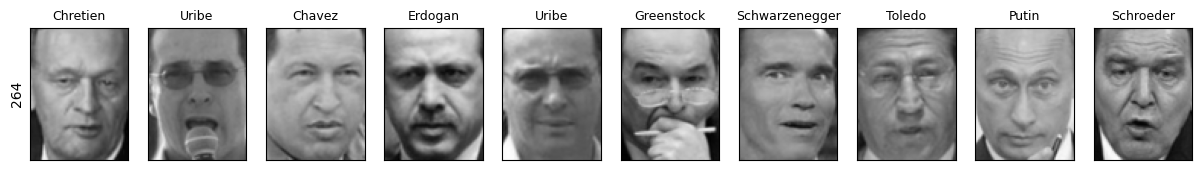

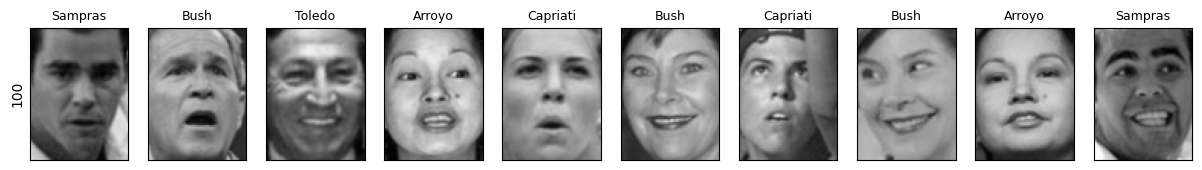

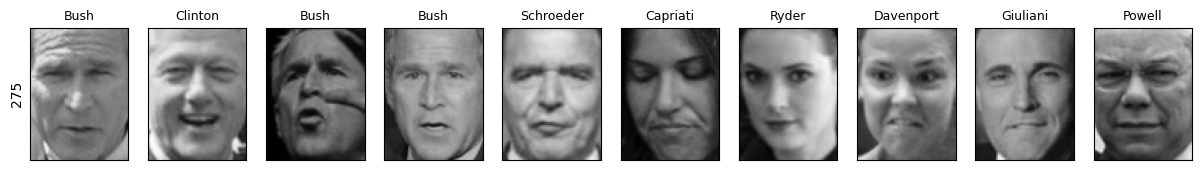

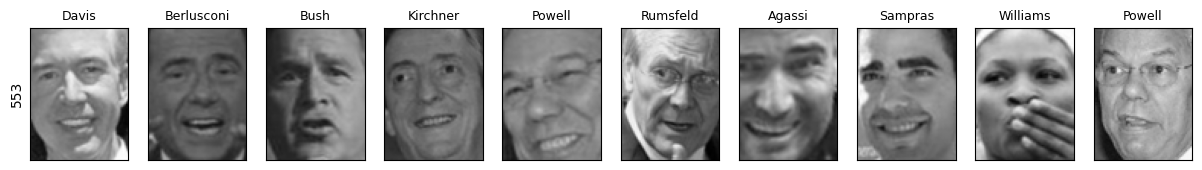

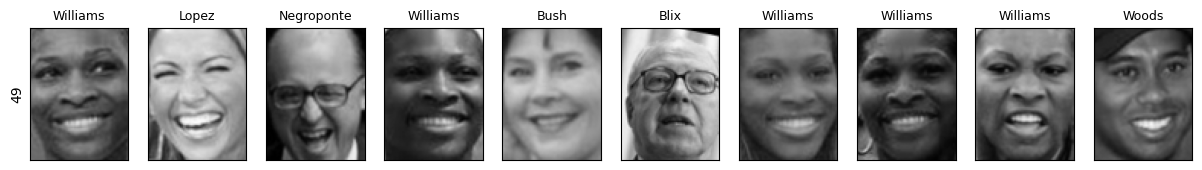

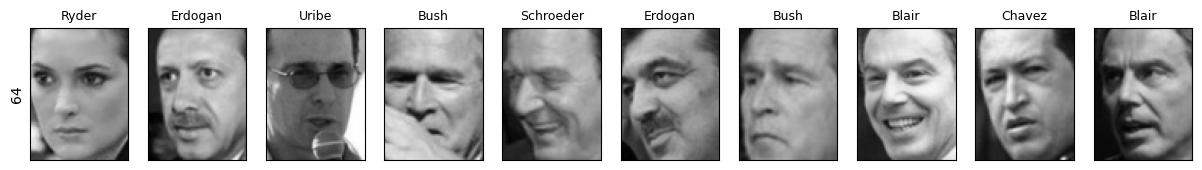

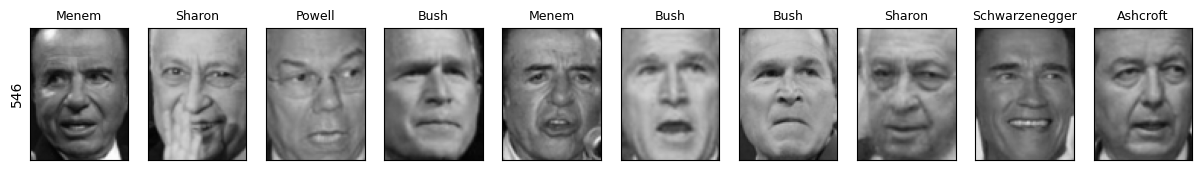

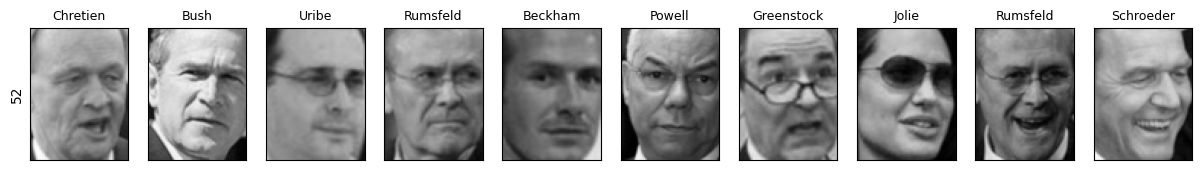

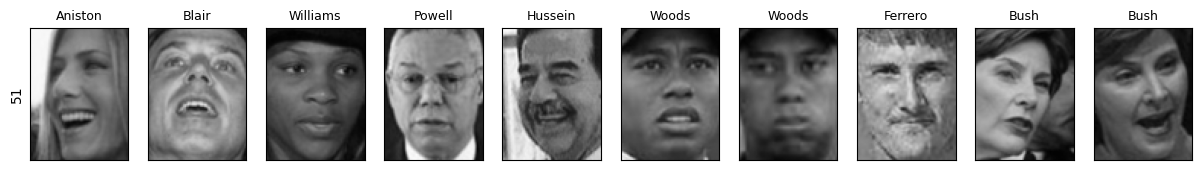

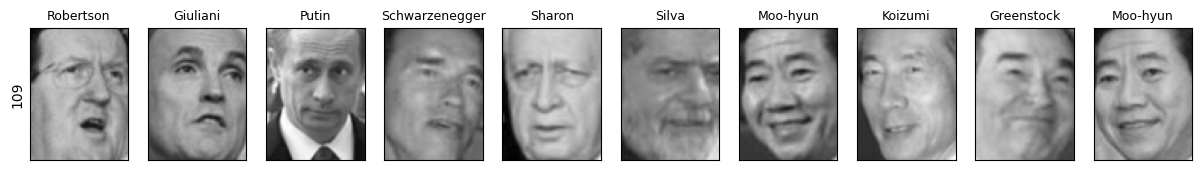

In [80]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

Some clusters show a clear theme (similar orientation or expression), but many clusters are too large to be homogeneous. With only 10 clusters for 2,000+ images, each cluster inevitably contains diverse faces.

Using more clusters (e.g., 40) can reveal finer structure:

cluster sizes agglomerative clustering: [139  35  23   2 111  39 106  33   5 161  60  41  70  17  30  20 134  40
  23  38  56 264   4  35  44  16  29 135  25  37  42  34   3  17  31   3
  21  27  76  37]


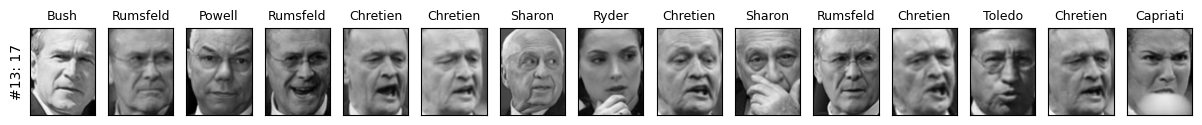

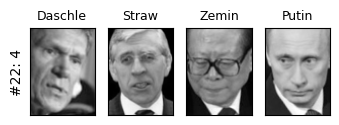

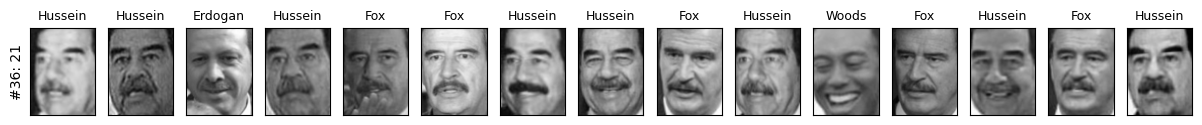

In [81]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

With 40 clusters, some highly specific groupings emerge -- clusters that capture particular expressions, head orientations, or even specific individuals. The hand-picked clusters shown above demonstrate that finer granularity can reveal more semantically coherent groups, though manual inspection is always needed to interpret what the algorithm has found.

### 4.6 Summary of Clustering Methods

| Property | k-Means | Agglomerative | DBSCAN |
|----------|---------|---------------|--------|
| **Must specify $k$** | Yes | Yes | No (automatic) |
| **Cluster shape** | Convex (spherical) | Depends on linkage | Arbitrary |
| **Detects noise** | No | No | Yes (label $-1$) |
| **Predict new data** | Yes | No | No |
| **Cluster sizes** | Roughly equal | Somewhat equal | Can be very uneven |
| **Speed** | Fast | Moderate | Moderate |
| **Provides hierarchy** | No | Yes (dendrogram) | No |
| **Characterization** | Cluster centers (means) | First few samples, dendrogram | Core/border/noise points |

Each algorithm has distinct strengths:
- **k-Means**: Fast, interpretable centers, can be used as vector quantization for feature extraction.
- **Agglomerative**: Provides a complete hierarchy via dendrograms, helpful for exploring different granularity levels.
- **DBSCAN**: Finds arbitrary-shaped clusters, detects outliers, does not require specifying $k$.

Clustering is inherently a qualitative, exploratory process. The "right" answer depends on what you are looking for, and manual inspection of results is almost always necessary.

## 5. Summary of the scikit-learn Estimator Interface

All algorithms in scikit-learn -- preprocessing, supervised, and unsupervised -- follow a consistent API:

**1. Instantiate** the estimator with hyperparameters:
```python
model = SomeAlgorithm(param1=value1, param2=value2)
```

**2. Fit** the model to data:
```python
model.fit(X_train)            # unsupervised
model.fit(X_train, y_train)   # supervised
```

**3. Apply** the model:

| Method | Purpose | Used By |
|--------|---------|---------|
| `predict(X_test)` | Produce output predictions ($\hat{y}$) | Classification, Regression, Clustering (k-Means only) |
| `transform(X_test)` | Produce new representation of $X$ | Preprocessing, PCA, NMF, k-Means distance features |
| `score(X_test, y_test)` | Evaluate model quality | Supervised models |
| `fit_predict(X)` | Fit and return labels (no predict for new data) | DBSCAN, Agglomerative Clustering |
| `fit_transform(X)` | Fit and transform in one step | t-SNE, scalers, PCA |

This consistent interface makes it easy to swap algorithms. For example, replacing `MinMaxScaler()` with `StandardScaler()` requires changing only one line of code -- the rest of the pipeline (fit, transform) stays the same.

## Chapter Summary

### Key Concepts

- **Unsupervised learning** discovers structure in data without labels. The two main categories are transformations (new representations) and clustering (grouping).

- **Preprocessing** (scaling) is essential for algorithms sensitive to feature magnitude: SVMs, neural networks, k-NN, and PCA. Tree-based methods do not require scaling. Always fit the scaler on training data only, then transform both training and test data with the same scaler.

- **PCA** finds orthogonal directions of maximum variance. It is the default method for dimensionality reduction, denoising, and visualization. Components are linear combinations of all original features. The eigenface application shows PCA can extract meaningful features from images.

- **NMF** decomposes non-negative data into non-negative components. It produces interpretable, parts-based representations and excels at source separation and topic modeling.

- **t-SNE** creates excellent 2D visualizations by preserving local neighborhood structure. It cannot transform new data and is used only for visualization.

- **k-Means** partitions data into $k$ spherical clusters by iteratively optimizing cluster centers. Fast and simple, but requires knowing $k$ and assumes convex clusters. Can also serve as a feature extraction method via vector quantization.

- **Agglomerative clustering** builds a hierarchy from bottom up. Dendrograms provide a complete view of cluster structure at all levels, helping choose the number of clusters after examining the data.

- **DBSCAN** finds arbitrarily shaped clusters based on density. It automatically determines the number of clusters, identifies noise points, and does not require specifying $k$. The `eps` parameter is the most important to tune.

- **Evaluating clustering** is inherently difficult. ARI is the correct metric when ground truth is available (never use accuracy). The silhouette score works without labels but favors compact clusters and may not reflect meaningful structure.

### Practical Workflow

1. **Scale features** using StandardScaler or MinMaxScaler (fit on training data only).
2. **Explore** with PCA (2D scatter plot) or t-SNE to understand data structure.
3. **Choose a clustering method** based on expected cluster shape and whether you know the number of clusters.
4. **Evaluate** visually and with metrics like silhouette scores or ARI (if labels exist).
5. **Iterate** on parameters and number of clusters, inspecting results manually.
6. **Use transformations as preprocessing** for downstream supervised learning when appropriate.